In [83]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import random
import joblib

import scipy.stats as stats
from scipy.stats import chi2_contingency

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from collections import Counter
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
import statsmodels.api as sm

from sklearn.tree import plot_tree


In [84]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')
df1 = df1.drop('COMMENCED_YEAR', axis=1)

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,POLICY_STATUS
0,NJEV2114189,ENDOW,43,M,60288,STANDING ORDER,3,1,700000,700000,0,0,0,33,F,M,LAPSE
1,NJEV2113425,ENDOW,43,M,30144,STANDING ORDER,5,1,350000,350000,0,0,0,38,F,M,LAPSE
2,NJEV2113443,ENDOW,48,M,32136,STANDING ORDER,3,1,600000,600000,0,0,0,34,M,M,LAPSE
3,NJEV2117189,ENDOW,40,M,30540,STANDING ORDER,3,1,250000,250000,0,0,0,34,M,M,LAPSE
4,NJEV2116298,ENDOW,48,M,101784,STANDING ORDER,3,1,1900000,1900000,0,0,0,32,F,M,LAPSE


In [85]:
#Shape of the dataframe
print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (41043, 17)


In [86]:
#Columns of the dataframe
df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'PAYMENT_FREQUENCY',
       'ANNUAL_PREMIUM', 'PAYMENT_METHOD', 'TENURE_MONTHS', 'NO_OF_COVERS',
       'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED',
       'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE',
       'GENDER', 'MARITAL_STATUS', 'POLICY_STATUS'],
      dtype='object')

In [87]:
# Basic dataset information
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41043 entries, 0 to 41042
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   POLICYNO                    41043 non-null  object
 1   PRODUCT_TYPE                41043 non-null  object
 2   POLICYTERM_YEARS            41043 non-null  int64 
 3   PAYMENT_FREQUENCY           41043 non-null  object
 4   ANNUAL_PREMIUM              41043 non-null  int64 
 5   PAYMENT_METHOD              41043 non-null  object
 6   TENURE_MONTHS               41043 non-null  int64 
 7   NO_OF_COVERS                41043 non-null  int64 
 8   TOTAL_SUMINSURED            41043 non-null  int64 
 9   BASIC_SUMINSURED            41043 non-null  int64 
 10  ACCIDENT_SUMINSURED         41043 non-null  int64 
 11  HOSPITALIZATION_SUMINSURED  41043 non-null  int64 
 12  OTHER COVERS_SUMINSURED     41043 non-null  int64 
 13  AGE                         41043 non-null  in

<Axes: >

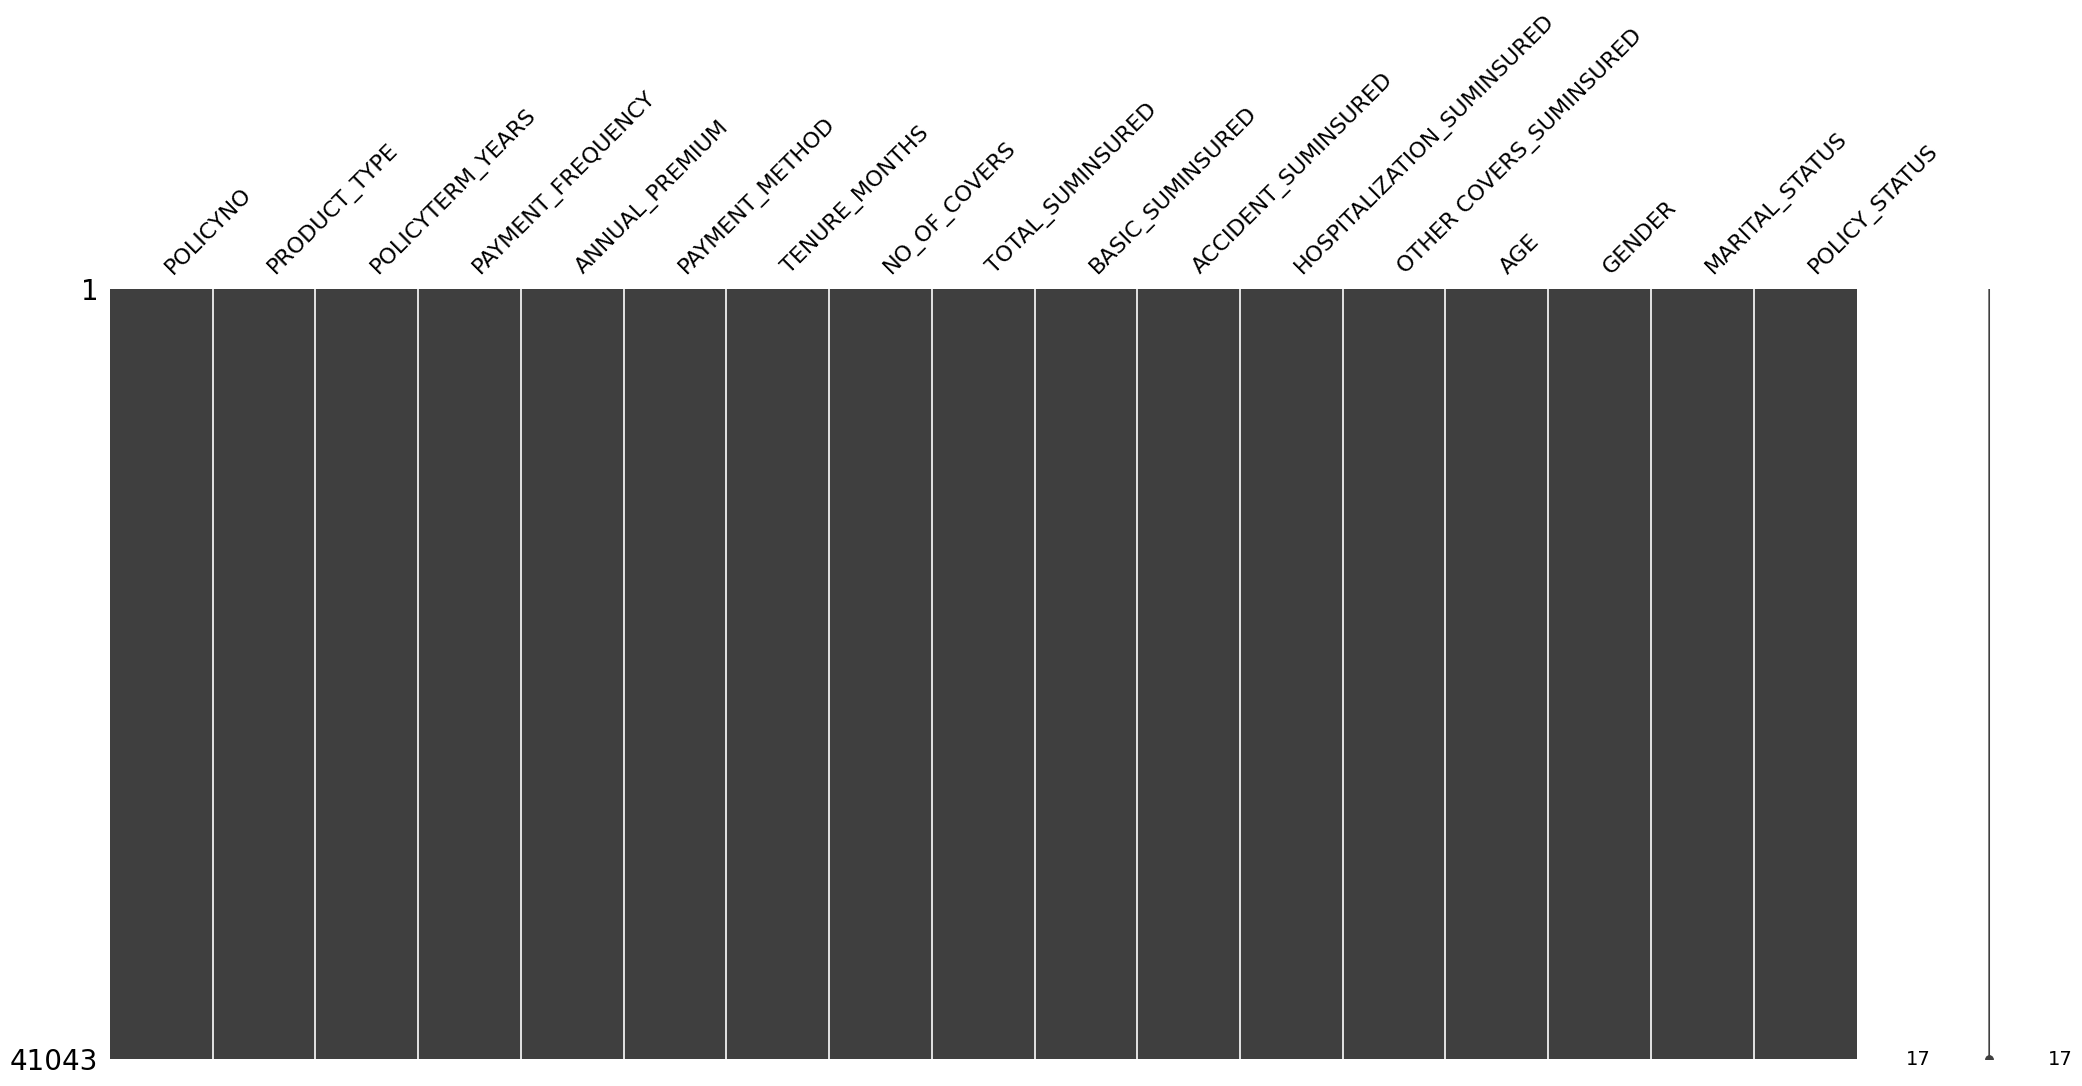

In [88]:
#Visualize Missing Values

msno.matrix(df1)


In [89]:
#Check whether there's any null values

df1.isnull().any().any()

False

In [90]:
#No of missing values in each column

df1.isnull().sum()

POLICYNO                      0
PRODUCT_TYPE                  0
POLICYTERM_YEARS              0
PAYMENT_FREQUENCY             0
ANNUAL_PREMIUM                0
PAYMENT_METHOD                0
TENURE_MONTHS                 0
NO_OF_COVERS                  0
TOTAL_SUMINSURED              0
BASIC_SUMINSURED              0
ACCIDENT_SUMINSURED           0
HOSPITALIZATION_SUMINSURED    0
OTHER COVERS_SUMINSURED       0
AGE                           0
GENDER                        0
MARITAL_STATUS                0
POLICY_STATUS                 0
dtype: int64

In [91]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 41043
Unique observations: 41043
**No duplicates Found!**


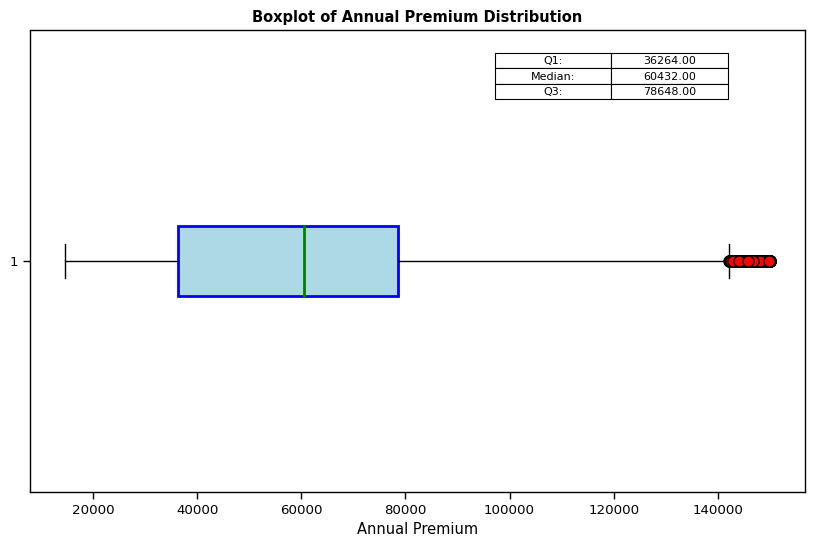

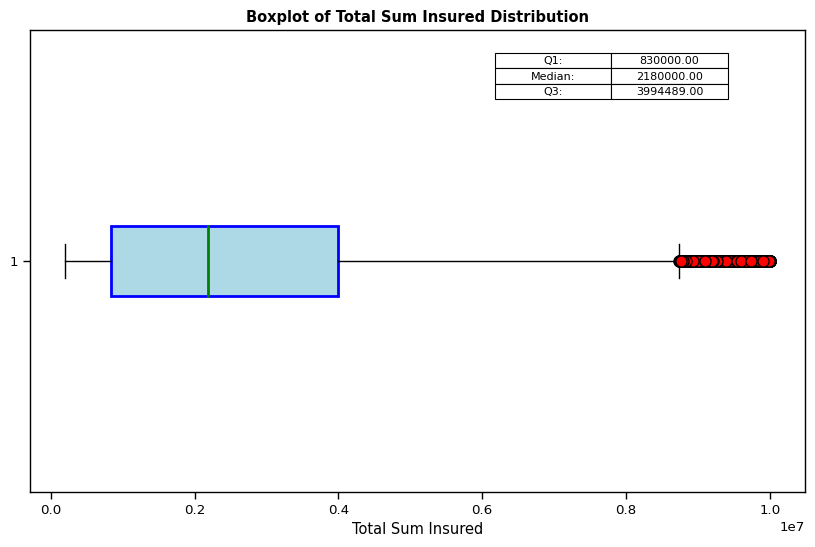

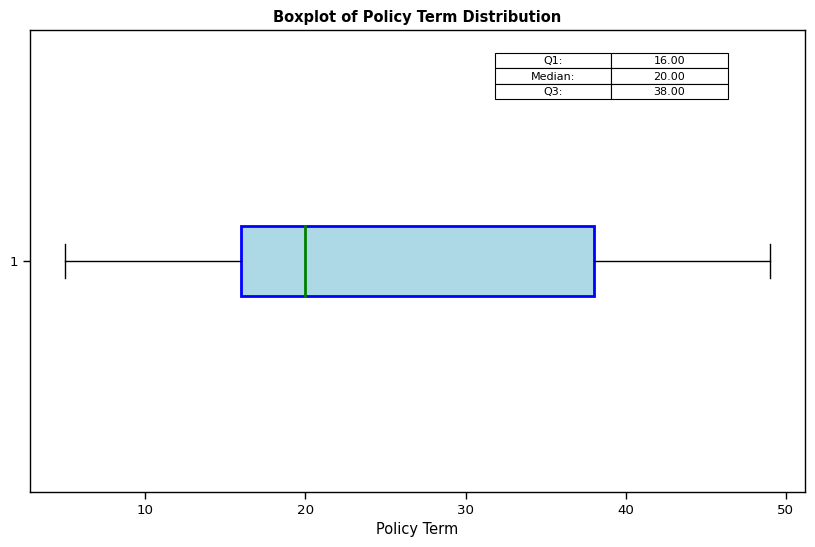

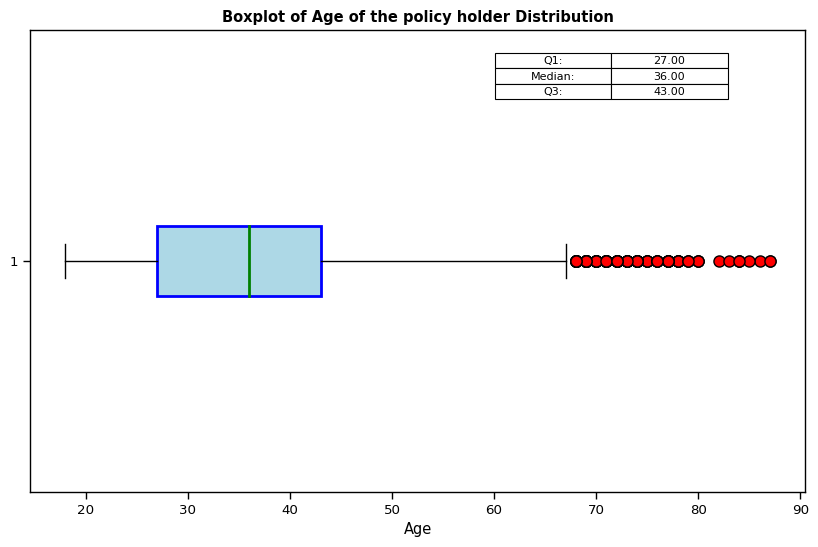

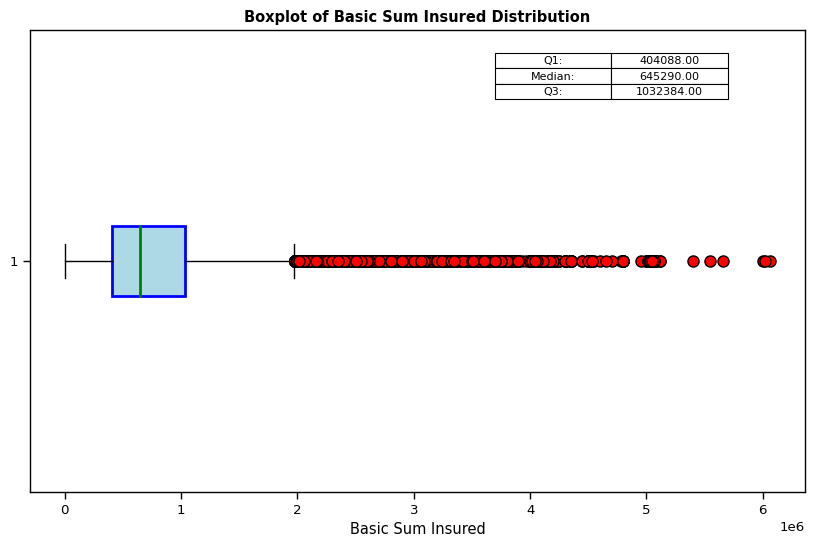

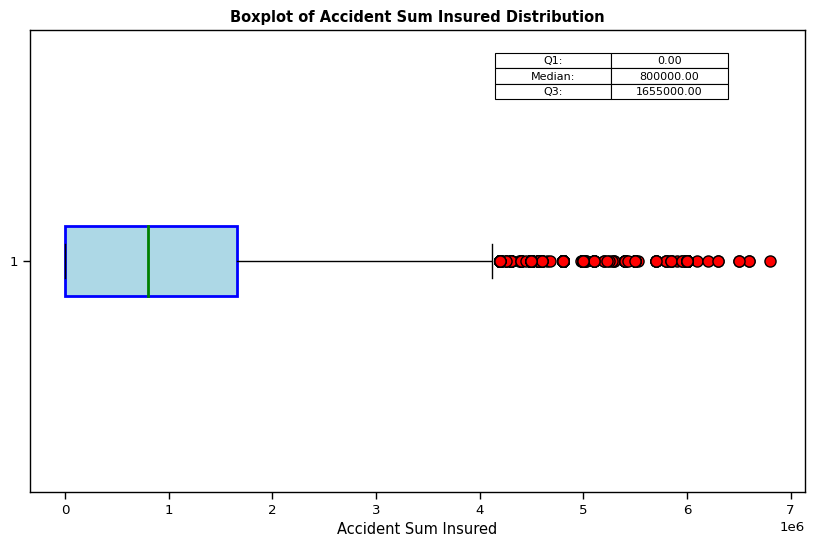

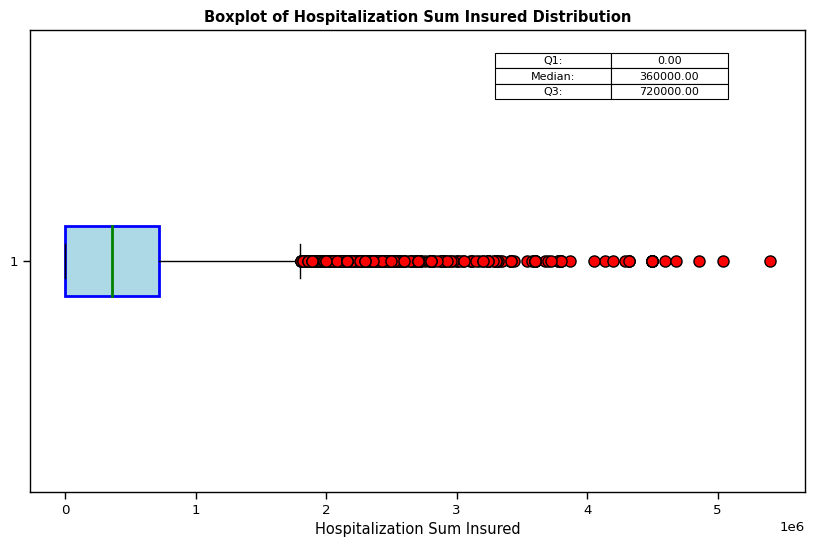

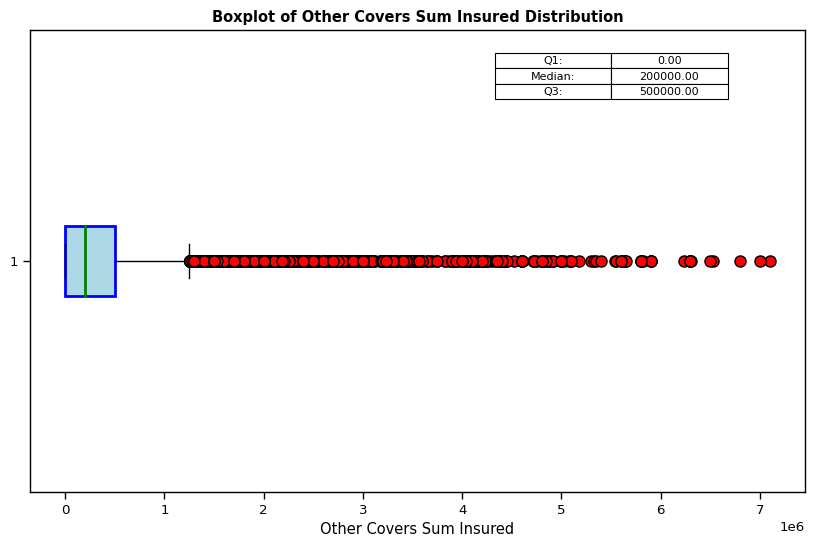

In [92]:
# Box Plots to check the distribution of data

def create_custom_boxplot(data, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values
    quartiles = np.percentile(data, [25, 50, 75])
    q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

    # Create a table to display quartile values
    table_data = [['Q1:', f'{q1:.2f}'],
                  ['Median:', f'{median:.2f}'],
                  ['Q3:', f'{q3:.2f}']]

    # Adjust the bbox parameter to move the table to the top right corner
    table = ax.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    plt.show()

create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium')
create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured')
create_custom_boxplot(df1['POLICYTERM_YEARS'], 'Boxplot of Policy Term Distribution', 'Policy Term')
create_custom_boxplot(df1['AGE'], 'Boxplot of Age of the policy holder Distribution', 'Age')
create_custom_boxplot(df1['BASIC_SUMINSURED'], 'Boxplot of Basic Sum Insured Distribution', 'Basic Sum Insured')
create_custom_boxplot(df1['ACCIDENT_SUMINSURED'], 'Boxplot of Accident Sum Insured Distribution', 'Accident Sum Insured')
create_custom_boxplot(df1['HOSPITALIZATION_SUMINSURED'], 'Boxplot of Hospitalization Sum Insured Distribution', 'Hospitalization Sum Insured')
create_custom_boxplot(df1['OTHER COVERS_SUMINSURED'], 'Boxplot of Other Covers Sum Insured Distribution', 'Other Covers Sum Insured')

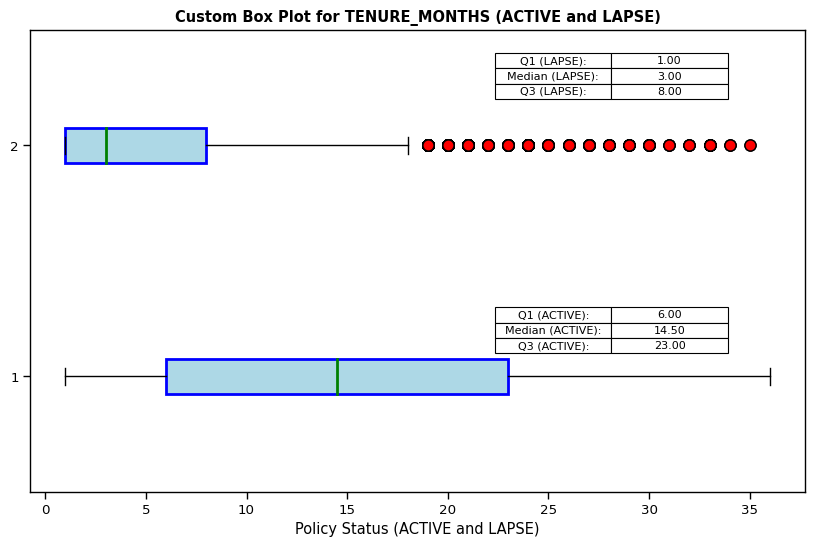

In [93]:
# Policy Status wise distribution of policies for TENURE_MONTHS, TOTAL_PAYMENT, NO_OF_SETTLED_CLAIMS, PAIDCLAIM_AMOUNT, LAST_CLAIM_PROCESSTIME_DAYS

active_data = df1[df1['POLICY_STATUS'] == 'ACTIVE']
lapse_data = df1[df1['POLICY_STATUS'] == 'LAPSE']

# Create a function to create custom box plots
def create_custom_boxplots(data1, data2, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = [1, 2]  # Define positions for the two boxplots
    boxplot1 = ax.boxplot([data1], positions=[positions[0]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
    
    boxplot2 = ax.boxplot([data2], positions=[positions[1]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values for data1
    quartiles1 = np.percentile(data1, [25, 50, 75])
    q1_1, median_1, q3_1 = quartiles1[0], quartiles1[1], quartiles1[2]

    # Calculate quartile values for data2
    quartiles2 = np.percentile(data2, [25, 50, 75])
    q1_2, median_2, q3_2 = quartiles2[0], quartiles2[1], quartiles2[2]

    # Create tables to display quartile values for data1
    table_data1 = [
        [f'Q1 (ACTIVE):', f'{q1_1:.2f}'],
        [f'Median (ACTIVE):', f'{median_1:.2f}'],
        [f'Q3 (ACTIVE):', f'{q3_1:.2f}'],
    ]

    # Create tables to display quartile values for data2
    table_data2 = [
        [f'Q1 (LAPSE):', f'{q1_2:.2f}'],
        [f'Median (LAPSE):', f'{median_2:.2f}'],
        [f'Q3 (LAPSE):', f'{q3_2:.2f}'],
    ]

    # Adjust the bbox parameter to move the tables to separate positions
    table1 = ax.table(cellText=table_data1, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.3, 0.3, 0.1])
    table1.auto_set_font_size(False)
    table1.set_fontsize(8)

    table2 = ax.table(cellText=table_data2, colWidths=[0.6, 0.6], cellLoc='center', loc='lower right', bbox=[0.6, 0.85, 0.3, 0.1])
    table2.auto_set_font_size(False)
    table2.set_fontsize(8)

    plt.show()



# Call the function to create the box plots
create_custom_boxplots(active_data['TENURE_MONTHS'], lapse_data['TENURE_MONTHS'], "Custom Box Plot for TENURE_MONTHS (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")


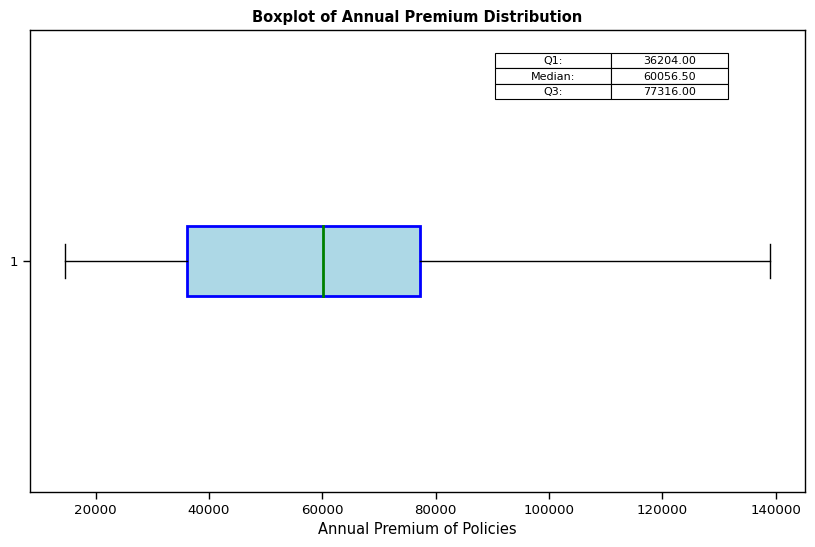

In [94]:
# Remove Outliers from Annual Premium of policies

column_name = 'ANNUAL_PREMIUM'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.5 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium of Policies')

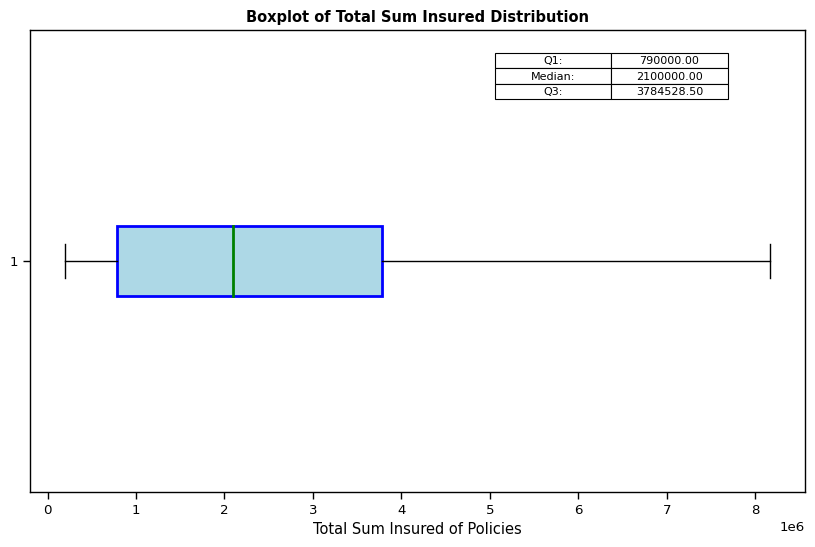

In [95]:
# Remove Outliers from Total Sum Insured of policies

column_name = 'TOTAL_SUMINSURED'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.6 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured of Policies')

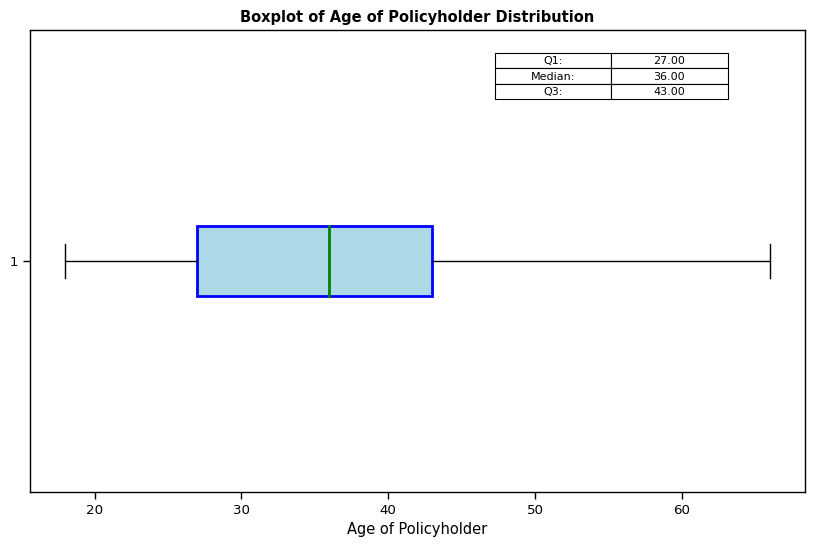

In [96]:
# Remove Outliers from Age of the Policy Holder

column_name = 'AGE'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.8 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['AGE'], 'Boxplot of Age of Policyholder Distribution', 'Age of Policyholder')

In [97]:
#Shape of the dataframe after removing outliers

print("The shape of the dataframe after removing outliers is: {}".format(df1.shape))

The shape of the dataframe after removing outliers is: (39316, 17)


In [98]:

# Group the data by POLICY_STATUS and count occurrences

policy_status_counts = df1['POLICY_STATUS'].value_counts()
percentage = (policy_status_counts / policy_status_counts.sum()) * 100
policy_status_summary = pd.DataFrame({'Count': policy_status_counts, 'Percentage': percentage})

policy_status_summary.rename(columns={'index': 'POLICY_STATUS'}, inplace=True)
policy_status_summary.sort_values(by='Count', ascending=True, inplace=True)

print(policy_status_summary)


               Count  Percentage
POLICY_STATUS                   
ACTIVE          8842   22.489572
LAPSE          30474   77.510428


In [99]:
#Find unique values in categorical variables

catagorical = [i for i in df1.columns if df1[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df1[i].unique())

POLICYNO : ['NJEV2114189' 'NJEV2113425' 'NJEV2113443' ... 'LI4202460' 'LI4201796'
 'LI4203622']
PRODUCT_TYPE : ['ENDOW' 'UL']
PAYMENT_FREQUENCY : ['M' 'Q' 'H' 'A']
PAYMENT_METHOD : ['STANDING ORDER' 'DIGITAL PAYMENT' 'CASH']
GENDER : ['F' 'M']
MARITAL_STATUS : ['M' 'S']
POLICY_STATUS : ['LAPSE' 'ACTIVE']


In [100]:
#Count unique values in categorical variables

df1.describe(include=['object']).T

,count,unique,top,freq
POLICYNO,39316,39316,NJEV2114189,1
PRODUCT_TYPE,39316,2,ENDOW,26299
PAYMENT_FREQUENCY,39316,4,M,30299
PAYMENT_METHOD,39316,3,CASH,32077
GENDER,39316,2,M,21896
MARITAL_STATUS,39316,2,M,27220
POLICY_STATUS,39316,2,LAPSE,30474


In [101]:
# Shows statistical summaries for all numeric columns
df1.describe()

,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE
count,39316.000000,39316.000000,39316.000000,39316.000000,3.931600e+04,3.931600e+04,3.931600e+04,3.931600e+04,3.931600e+04,39316.000000
mean,24.615525,61042.942746,7.445773,2.941678,2.533436e+06,8.204482e+05,9.844520e+05,4.279225e+05,3.006132e+05,35.889536
std,12.276751,28112.102881,7.758001,1.329053,1.921379e+06,6.067083e+05,1.067562e+06,4.430093e+05,4.311427e+05,10.445361
min,5.000000,14652.000000,1.000000,1.000000,2.000000e+05,4.088000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000
25%,16.000000,36156.000000,1.000000,1.000000,8.000000e+05,4.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,27.000000
50%,20.000000,59436.000000,4.000000,4.000000,2.110000e+06,6.100000e+05,8.000000e+05,3.600000e+05,1.750000e+05,36.000000
75%,38.000000,75732.000000,12.000000,4.000000,3.800000e+06,1.016152e+06,1.500000e+06,6.400000e+05,5.000000e+05,43.000000
max,49.000000,138936.000000,36.000000,6.000000,8.164178e+06,6.016352e+06,6.300000e+06,5.400000e+06,5.640000e+06,66.000000


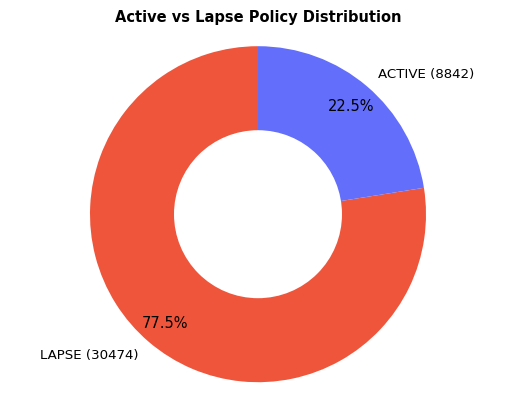

In [102]:
# Active and Lapse Policy Distribution

policy_status_counts = df1['POLICY_STATUS'].value_counts()
type_ = policy_status_counts.index
values = policy_status_counts.values
custom_colors = ['#EF553B', '#636EFA']

# Create labels with counts
labels = [f"{t} ({v})" for t, v in zip(type_, values)]

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=custom_colors, startangle=90, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

# Add a title
plt.title(f"Active vs Lapse Policy Distribution", fontweight='bold')

# Show the chart
plt.show()

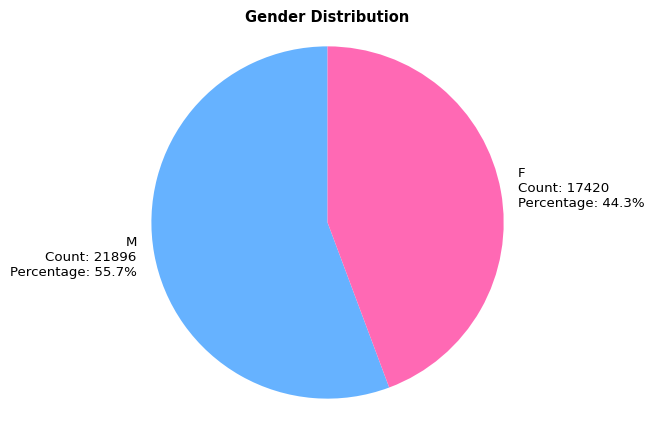

In [103]:
#Pie chart which represents Gender distribution of policy holders

# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution",fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

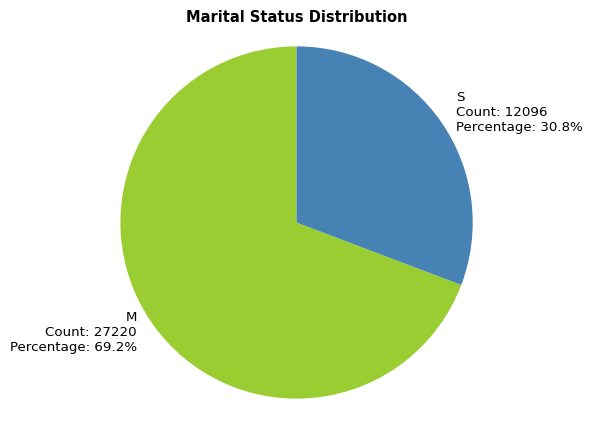

In [104]:
#Pie chart which represents distribution of Marital Status of policy holders

# Calculate marital status counts
marital_status_counts = df1['MARITAL_STATUS'].value_counts()

# Calculate percentages
total_count = len(df1)
marital_status_percentages = (marital_status_counts / total_count) * 100

# Define custom colors
custom_colors = ['yellowgreen', 'steelblue']  # Custom colors for Married and Single

# Create pie chart labels with marital status, count, and percentage
labels = marital_status_counts.index
labels_with_info = [f"{marital_status}\nCount: {count}\nPercentage: {percentage:.1f}%" for marital_status, count, percentage in zip(labels, marital_status_counts, marital_status_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Marital Status Distribution", fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

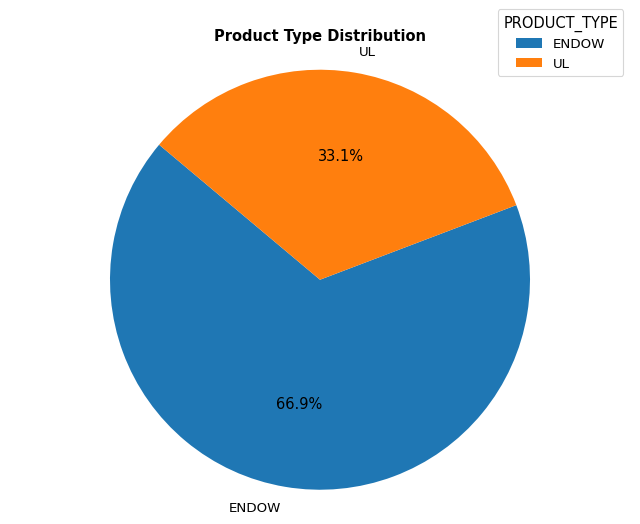

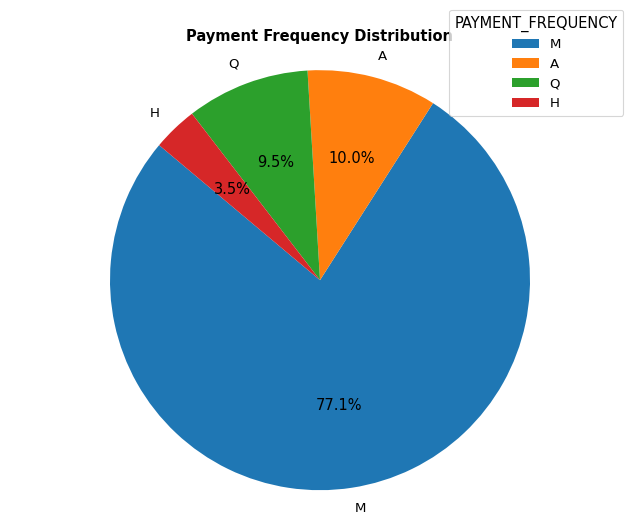

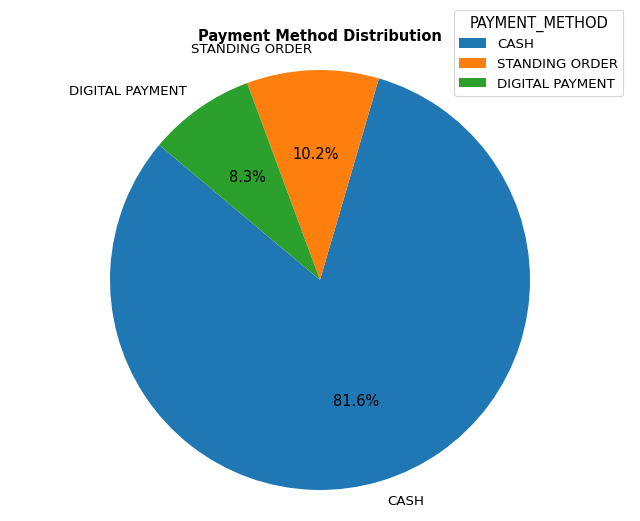

In [105]:
#Pie Charts for Product Type, Payment Frequecy, Payment Method

def create_pie_chart(data, column_name, title):
    # Group the data by the specified column and count the number of occurrences for each category
    column_counts = data[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    # Add a legend
    plt.legend(column_counts.index, title=column_name, loc='upper right', bbox_to_anchor=(1, 1.1))

    plt.show()


create_pie_chart(df1, 'PRODUCT_TYPE', 'Product Type Distribution')
create_pie_chart(df1, 'PAYMENT_FREQUENCY', 'Payment Frequency Distribution')
create_pie_chart(df1, 'PAYMENT_METHOD', 'Payment Method Distribution')


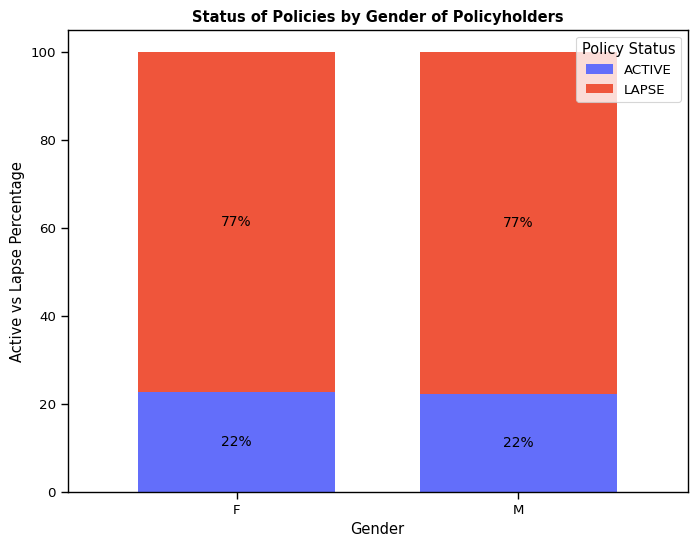

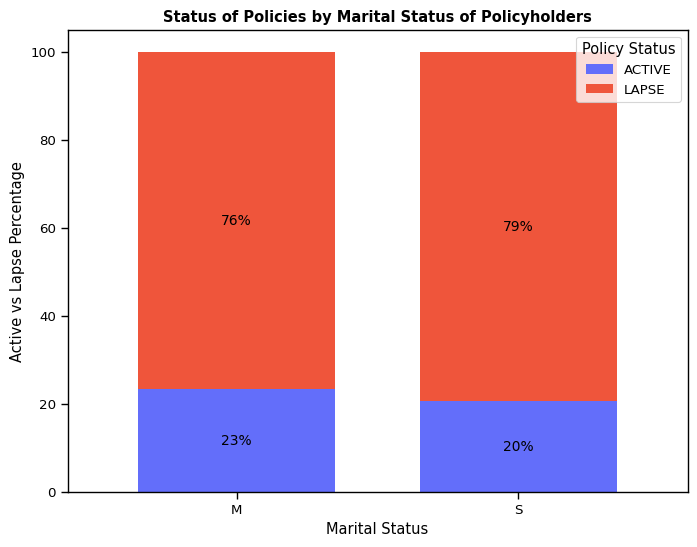

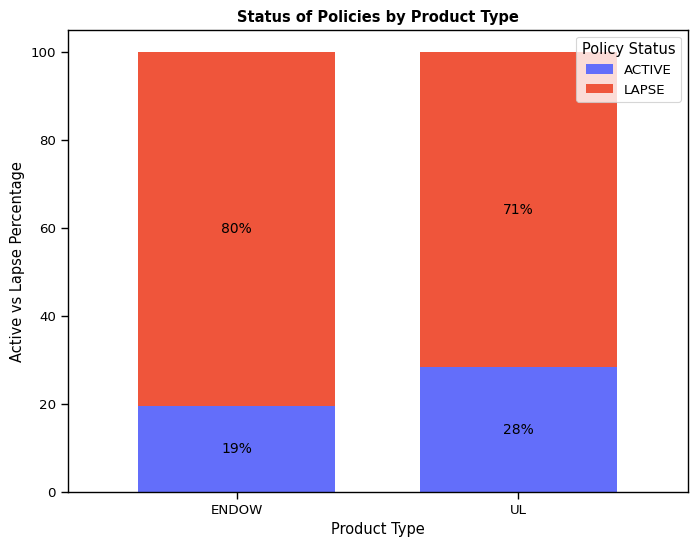

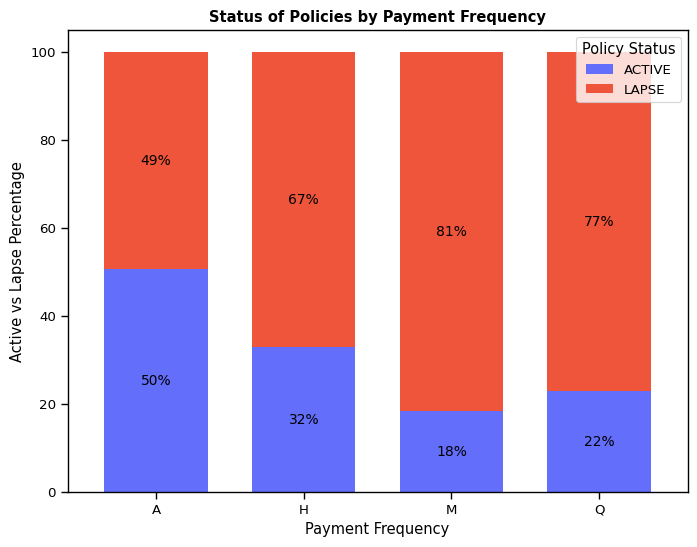

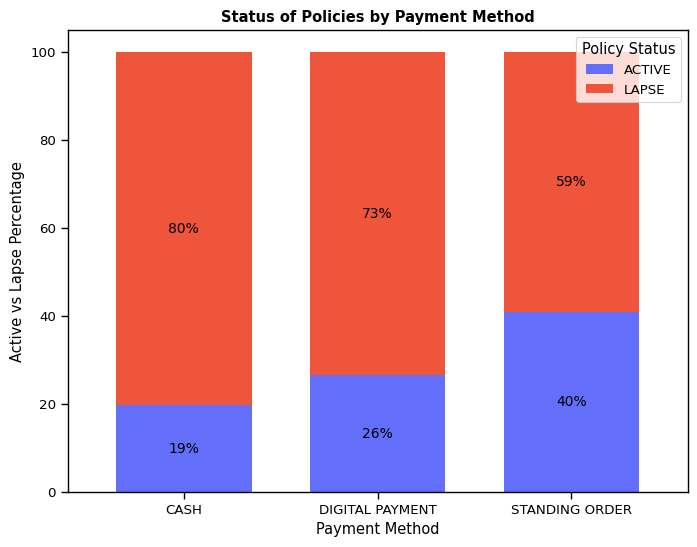

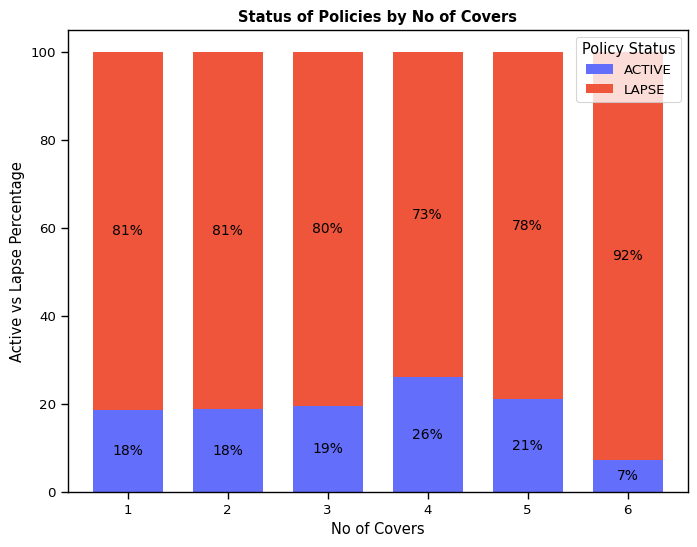

In [106]:
# Stacked bar charts to present the Active vs Lapse policy distribution of different categorical variables

def create_stacked_bar_chart(data, x_column, y_column, title, xlabel, ylabel, legend_title):
    # Group the data by the specified columns and count the number of occurrences in each group
    grouped = data.groupby([x_column, y_column]).size().unstack(fill_value=0)

    # Calculate the total count of items for each group
    total_counts = grouped.sum(axis=1)

    # Calculate the percentages
    percentage_grouped = grouped.div(total_counts, axis=0) * 100

    # Define custom colors for each category within the y_column
    custom_colors = {
        'ACTIVE': '#636EFA',
        'LAPSE': '#EF553B'
    }

    # Create the stacked bar chart with custom colors
    ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

    # Add data labels and percentages to each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Move the legend to the bottom
    plt.legend(title=legend_title, loc='upper right')

    plt.xticks(rotation=0)

    plt.show()


create_stacked_bar_chart(df1, 'GENDER', 'POLICY_STATUS', 'Status of Policies by Gender of Policyholders','Gender', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'MARITAL_STATUS', 'POLICY_STATUS', 'Status of Policies by Marital Status of Policyholders','Marital Status', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PRODUCT_TYPE', 'POLICY_STATUS', 'Status of Policies by Product Type','Product Type', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_FREQUENCY', 'POLICY_STATUS', 'Status of Policies by Payment Frequency','Payment Frequency', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_METHOD', 'POLICY_STATUS', 'Status of Policies by Payment Method','Payment Method', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'NO_OF_COVERS', 'POLICY_STATUS', 'Status of Policies by No of Covers','No of Covers', 'Active vs Lapse Percentage', 'Policy Status')

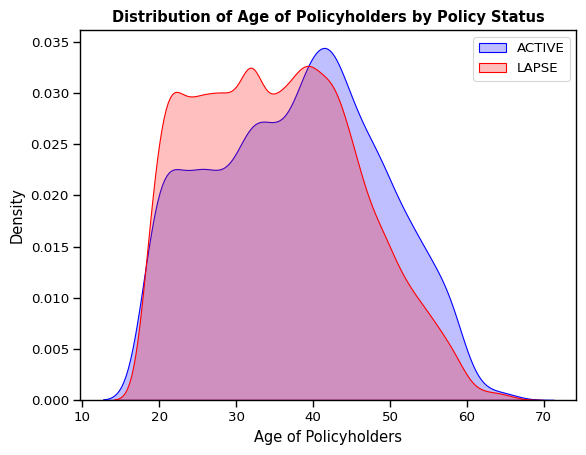

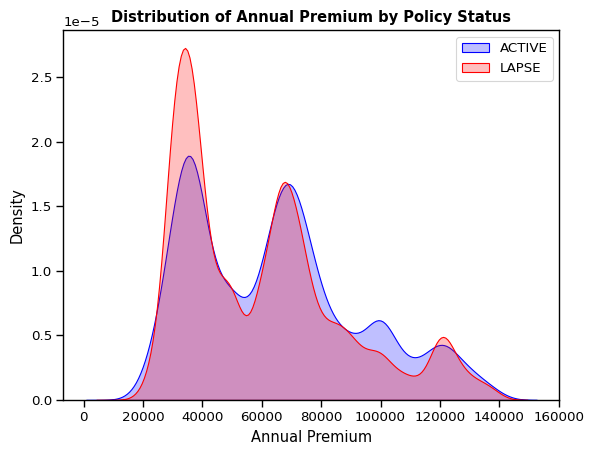

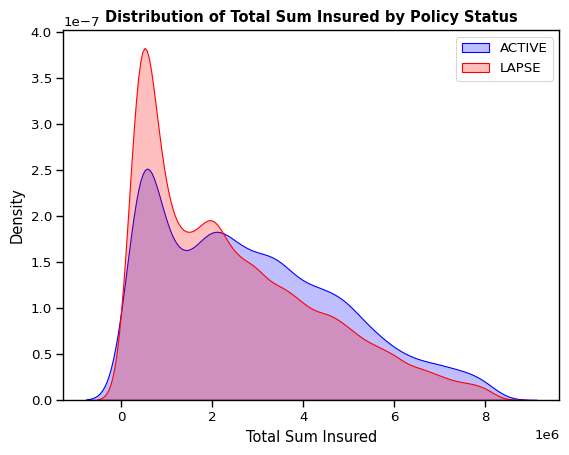

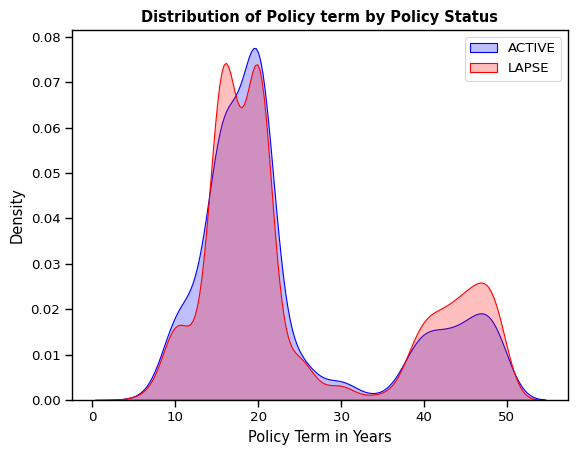

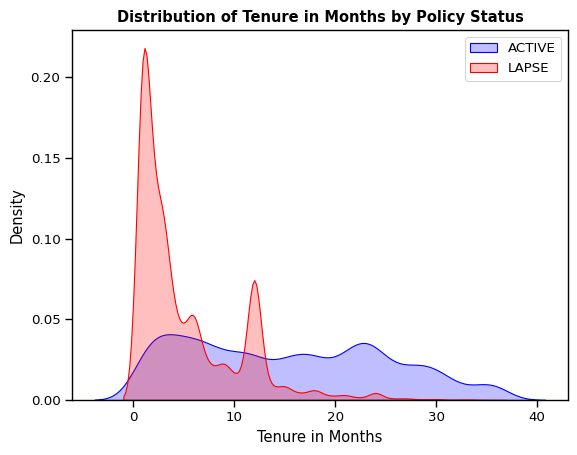

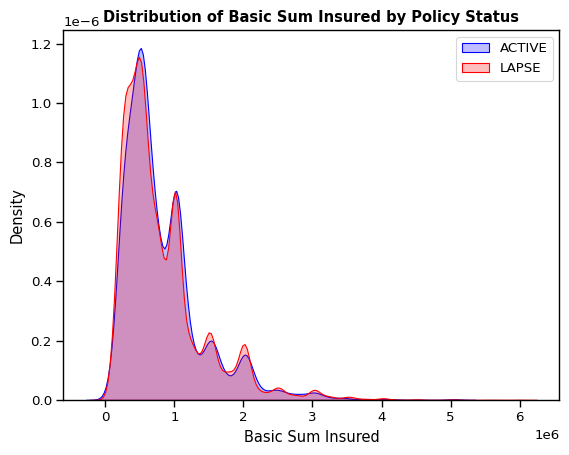

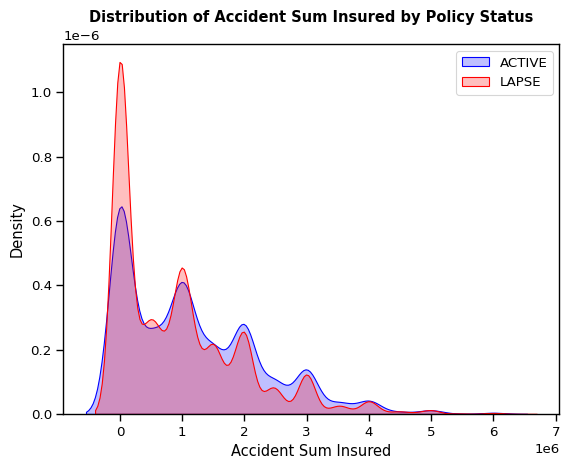

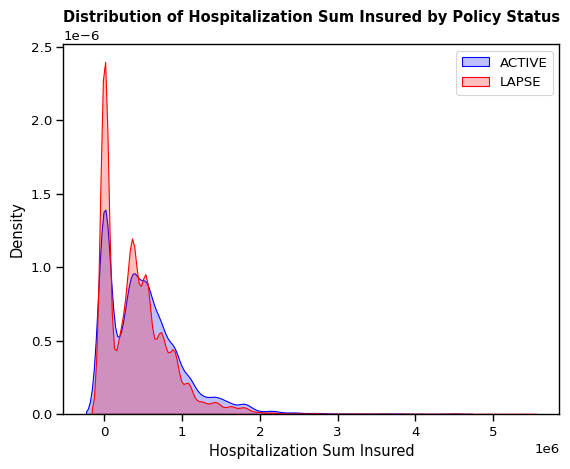

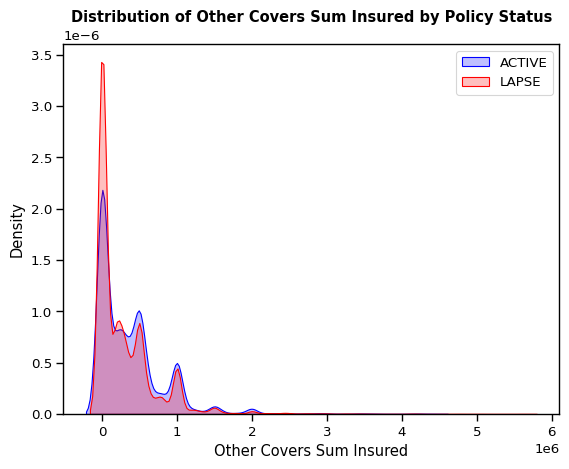

In [107]:
#Density plots to present the distribution of Active vs Lapse Policies with respect to different numerical variables

def create_density_plot(data, column, title, x_label, legend_labels, fill_colors):
    sns.set_context("paper", font_scale=1.1)
    ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[0]], color=fill_colors[0], fill=True)
    for i in range(1, len(legend_labels)):
        ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[i]], ax=ax, color=fill_colors[i], fill=True)
    ax.legend(legend_labels, loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(x_label)
    ax.set_title(title, fontweight='bold')
    plt.show()


legend_labels = ['ACTIVE', 'LAPSE']
fill_colors = ['Blue', 'Red']

create_density_plot(df1, 'AGE', 'Distribution of Age of Policyholders by Policy Status', 'Age of Policyholders', legend_labels, fill_colors)
create_density_plot(df1, 'ANNUAL_PREMIUM', 'Distribution of Annual Premium by Policy Status', 'Annual Premium', legend_labels, fill_colors)
create_density_plot(df1, 'TOTAL_SUMINSURED', 'Distribution of Total Sum Insured by Policy Status', 'Total Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'POLICYTERM_YEARS', 'Distribution of Policy term by Policy Status', 'Policy Term in Years', legend_labels, fill_colors)
create_density_plot(df1, 'TENURE_MONTHS', 'Distribution of Tenure in Months by Policy Status', 'Tenure in Months', legend_labels, fill_colors)
create_density_plot(df1, 'BASIC_SUMINSURED', 'Distribution of Basic Sum Insured by Policy Status', 'Basic Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'ACCIDENT_SUMINSURED', 'Distribution of Accident Sum Insured by Policy Status', 'Accident Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'HOSPITALIZATION_SUMINSURED', 'Distribution of Hospitalization Sum Insured by Policy Status', 'Hospitalization Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'OTHER COVERS_SUMINSURED', 'Distribution of Other Covers Sum Insured by Policy Status', 'Other Covers Sum Insured', legend_labels, fill_colors)



In [108]:
# Select categorical variables (object or category dtype)
categorical_vars = df1.select_dtypes(include=['object', 'category'])

# Select numerical variables (int or float dtype)
numerical_vars = df1.select_dtypes(include=['int', 'float'])

# Example of printing the lists of variables
print("Categorical Variables:")
print(categorical_vars.columns.tolist())

print("\nNumerical Variables:")
print(numerical_vars.columns.tolist())

Categorical Variables:
['POLICYNO', 'PRODUCT_TYPE', 'PAYMENT_FREQUENCY', 'PAYMENT_METHOD', 'GENDER', 'MARITAL_STATUS', 'POLICY_STATUS']

Numerical Variables:
['POLICYTERM_YEARS', 'ANNUAL_PREMIUM', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE']


In [109]:
#Chi squared test & Cramer's V for Product type and Policy Status

# Create a contingency table
ct1 = pd.crosstab(df1['PRODUCT_TYPE'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct1)

# Calculate Cramer's V
n1 = ct1.sum().sum()
C1, R1 = ct1.shape[1], ct1.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n1 * min(C1 - 1, R1 - 1)))

# Print the results
print(ct1)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
PRODUCT_TYPE                
ENDOW            5144  21155
UL               3698   9319
Chi-Squared Test Statistic: 390.65728321925286
P-Value: 5.953689948991503e-87
Cramer's V: 0.09968120963991434


In [110]:
#Chi squared test & Cramer's V for Payment Frequency and Policy Status

# Create a contingency table
ct2 = pd.crosstab(df1['PAYMENT_FREQUENCY'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct2)

# Calculate Cramer's V
n2 = ct2.sum().sum()
C2, R2 = ct2.shape[1], ct2.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n2 * min(C2 - 1, R2 - 1)))

# Print the results
print(ct2)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS      ACTIVE  LAPSE
PAYMENT_FREQUENCY               
A                    1987   1942
H                     446    912
M                    5552  24747
Q                     857   2873
Chi-Squared Test Statistic: 2163.1882207410067
P-Value: 0.0
Cramer's V: 0.23456461166164255


In [111]:
#Chi squared test & Cramer's V for Payment Method and Policy Status

# Create a contingency table
ct3 = pd.crosstab(df1['PAYMENT_METHOD'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct3)

# Calculate Cramer's V
n3 = ct3.sum().sum()
C3, R3 = ct3.shape[1], ct3.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n3 * min(C3 - 1, R3 - 1)))

# Print the results
print(ct3)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS    ACTIVE  LAPSE
PAYMENT_METHOD                
CASH               6341  25736
DIGITAL PAYMENT     864   2380
STANDING ORDER     1637   2358
Chi-Squared Test Statistic: 951.488763480957
P-Value: 2.4369140598473378e-207
Cramer's V: 0.1555668896794479


In [112]:
#Chi squared test & Cramer's V for Gender and Policy Status

# Create a contingency table
ct4 = pd.crosstab(df1['GENDER'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct4)

# Calculate Cramer's V
n4 = ct4.sum().sum()
C4, R4 = ct4.shape[1], ct4.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n4 * min(C4 - 1, R4 - 1)))

# Print the results
print(ct4)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
GENDER                      
F                3966  13454
M                4876  17020
Chi-Squared Test Statistic: 1.3519876086865785
P-Value: 0.2449309407470644
Cramer's V: 0.005864104384571556


In [113]:
#Chi squared test & Cramer's V for Marital Status and Policy Status

# Create a contingency table
ct5 = pd.crosstab(df1['MARITAL_STATUS'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct5)

# Calculate Cramer's V
n5 = ct5.sum().sum()
C5, R5 = ct5.shape[1], ct5.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n5 * min(C5 - 1, R5 - 1)))

# Print the results
print(ct5)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS   ACTIVE  LAPSE
MARITAL_STATUS               
M                 6350  20870
S                 2492   9604
Chi-Squared Test Statistic: 35.559256721427325
P-Value: 2.474085457065173e-09
Cramer's V: 0.030074033147696175


In [114]:
def point_biserial_correlation(iv, dv):
    """Calculates the point-biserial correlation between two variables.

    Args:
      iv: Independent Variable.
      dv: Dependent Variable.

    Returns:
      The point-biserial correlation coefficient.
    """
    
    # Calculate the mean for 'LAPSE' policies
    mean_X1 = np.mean(iv[dv == 'LAPSE'])
    
    # Calculate the mean for 'ACTIVE' policies
    mean_X0 = np.mean(iv[dv == 'ACTIVE'])
    
    # Calculate the overall standard deviation
    std_X = np.std(iv)
    
    # Calculate the point-biserial correlation coefficient
    point_biserial_correlation = (mean_X1 - mean_X0) / std_X
    
    return point_biserial_correlation


# Extract the Independent and Dependent Variables

iv1 = df1['ANNUAL_PREMIUM']
iv2 = df1['POLICYTERM_YEARS']
iv3 = df1['TOTAL_SUMINSURED']
iv4 = df1['NO_OF_COVERS']
iv5 = df1['AGE']
iv6 = df1['BASIC_SUMINSURED']
iv7 = df1['ACCIDENT_SUMINSURED']
iv8 = df1['HOSPITALIZATION_SUMINSURED']
iv9 = df1['OTHER COVERS_SUMINSURED']
dv1 = df1['POLICY_STATUS']


# Calculate the point-biserial correlation coefficient.
point_biserial_corr_1 = point_biserial_correlation(iv1, dv1)
point_biserial_corr_2 = point_biserial_correlation(iv2, dv1)
point_biserial_corr_3 = point_biserial_correlation(iv3, dv1)
point_biserial_corr_4 = point_biserial_correlation(iv4, dv1)
point_biserial_corr_5 = point_biserial_correlation(iv5, dv1)
point_biserial_corr_6 = point_biserial_correlation(iv6, dv1)
point_biserial_corr_7 = point_biserial_correlation(iv7, dv1)
point_biserial_corr_8 = point_biserial_correlation(iv8, dv1)
point_biserial_corr_9 = point_biserial_correlation(iv9, dv1)

# Print the point-biserial correlation coefficient.
print(f"Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: {point_biserial_corr_1}")
print(f"Point-Biserial Correlation Coefficient between Policy Term and Policy Status: {point_biserial_corr_2}")
print(f"Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: {point_biserial_corr_3}")
print(f"Point-Biserial Correlation Coefficient between No of covers and Policy Status: {point_biserial_corr_4}")
print(f"Point-Biserial Correlation Coefficient between Age and Policy Status: {point_biserial_corr_5}")
print(f"Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: {point_biserial_corr_6}")
print(f"Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: {point_biserial_corr_7}")
print(f"Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: {point_biserial_corr_8}")
print(f"Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: {point_biserial_corr_9}")



Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: -0.16608433888966598
Point-Biserial Correlation Coefficient between Policy Term and Policy Status: 0.1085425416583252
Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: -0.21314989854301963
Point-Biserial Correlation Coefficient between No of covers and Policy Status: -0.16464668538094077
Point-Biserial Correlation Coefficient between Age and Policy Status: -0.22983130778210262
Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: -0.019349024780874965
Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: -0.2158331111125466
Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: -0.20717232880631758
Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: -0.17536660962021164


In [115]:
#Label Encoding for columns with 2 or less unique values

df2 = df1.copy()

#Encoding Gender as Male=1 and Female=0
df2.GENDER = [1 if x == "M" else 0 for x in df2.GENDER]

#Encoding Marital Status as Married=1 and Unmarried=0
df2.MARITAL_STATUS = [1 if x == "M" else 0 for x in df2.MARITAL_STATUS]

#Encoding Product Type as ENDOW=1 and UL=0
df2.PRODUCT_TYPE = [1 if x == "ENDOW" else 0 for x in df2.PRODUCT_TYPE]

#Encoding Policy Status as Lapse=1 and Active=0
df2.POLICY_STATUS = [1 if x == "LAPSE" else 0 for x in df2.POLICY_STATUS]

In [116]:
df2.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,POLICY_STATUS
0,NJEV2114189,1,43,M,60288,STANDING ORDER,3,1,700000,700000,0,0,0,33,0,1,1
1,NJEV2113425,1,43,M,30144,STANDING ORDER,5,1,350000,350000,0,0,0,38,0,1,1
2,NJEV2113443,1,48,M,32136,STANDING ORDER,3,1,600000,600000,0,0,0,34,1,1,1
3,NJEV2117189,1,40,M,30540,STANDING ORDER,3,1,250000,250000,0,0,0,34,1,1,1
4,NJEV2116298,1,48,M,101784,STANDING ORDER,3,1,1900000,1900000,0,0,0,32,0,1,1


In [117]:
#Check the remaining categorical variables

catagorical = [i for i in df2.columns if df2[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df2[i].unique())

POLICYNO : ['NJEV2114189' 'NJEV2113425' 'NJEV2113443' ... 'LI4202460' 'LI4201796'
 'LI4203622']
PAYMENT_FREQUENCY : ['M' 'Q' 'H' 'A']
PAYMENT_METHOD : ['STANDING ORDER' 'DIGITAL PAYMENT' 'CASH']


In [118]:
# Define the columns required to one-hot encode

columns_to_encode = ['PAYMENT_FREQUENCY', 'PAYMENT_METHOD']

# Use Pandas' get_dummies function to perform one-hot encoding
dfe1 = pd.get_dummies(df2, columns=columns_to_encode)

columns_to_convert=['PAYMENT_FREQUENCY_A','PAYMENT_FREQUENCY_H','PAYMENT_FREQUENCY_Q','PAYMENT_FREQUENCY_M',
                    'PAYMENT_METHOD_CASH','PAYMENT_METHOD_DIGITAL PAYMENT','PAYMENT_METHOD_STANDING ORDER']

dfe1[columns_to_convert] = dfe1[columns_to_convert].astype(int)

In [119]:
dfe1 = dfe1.drop(["POLICYNO"], axis = 1)
dfe1.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,...,GENDER,MARITAL_STATUS,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,43,60288,3,1,700000,700000,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,1,43,30144,5,1,350000,350000,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,1,48,32136,3,1,600000,600000,0,0,0,...,1,1,1,0,0,1,0,0,0,1
3,1,40,30540,3,1,250000,250000,0,0,0,...,1,1,1,0,0,1,0,0,0,1
4,1,48,101784,3,1,1900000,1900000,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [120]:
print(dfe1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 39316 entries, 0 to 41042
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   PRODUCT_TYPE                    39316 non-null  int64
 1   POLICYTERM_YEARS                39316 non-null  int64
 2   ANNUAL_PREMIUM                  39316 non-null  int64
 3   TENURE_MONTHS                   39316 non-null  int64
 4   NO_OF_COVERS                    39316 non-null  int64
 5   TOTAL_SUMINSURED                39316 non-null  int64
 6   BASIC_SUMINSURED                39316 non-null  int64
 7   ACCIDENT_SUMINSURED             39316 non-null  int64
 8   HOSPITALIZATION_SUMINSURED      39316 non-null  int64
 9   OTHER COVERS_SUMINSURED         39316 non-null  int64
 10  AGE                             39316 non-null  int64
 11  GENDER                          39316 non-null  int64
 12  MARITAL_STATUS                  39316 non-null  int64
 13  POLICY

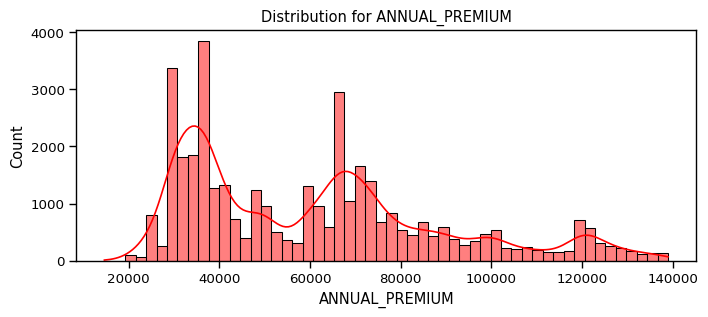

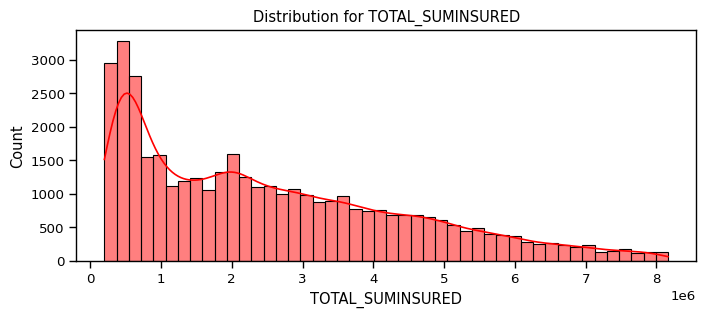

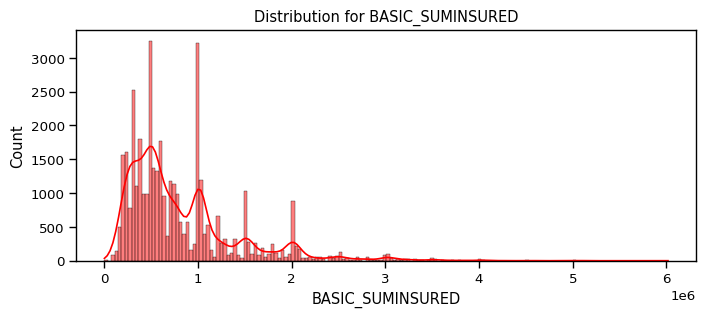

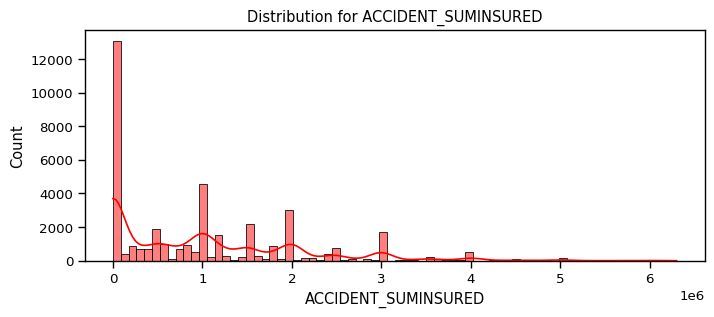

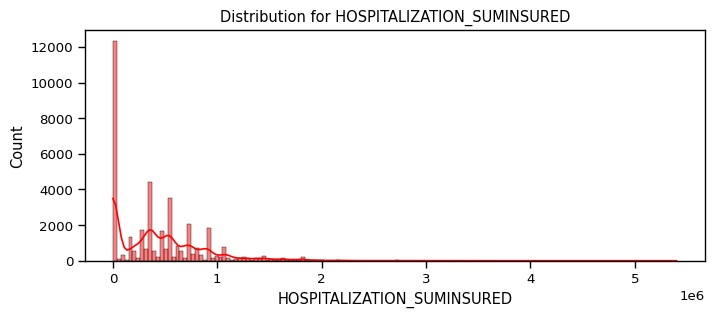

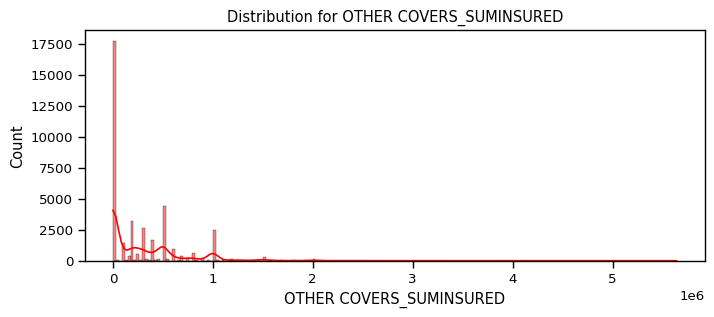

In [121]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color=color, kde=True)

col = ['ANNUAL_PREMIUM', 'TOTAL_SUMINSURED','BASIC_SUMINSURED','ACCIDENT_SUMINSURED','HOSPITALIZATION_SUMINSURED','OTHER COVERS_SUMINSURED']
for feature in col:
    distplot(feature, dfe1)

In [122]:
dfe1_std = dfe1.copy()

# Specify the columns to standardize
cols_to_standardize = ['ANNUAL_PREMIUM', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED',
                       'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED']

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the selected columns
dfe1_std[cols_to_standardize] = scaler.fit_transform(dfe1_std[cols_to_standardize])

In [123]:
dfe1_std.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,...,GENDER,MARITAL_STATUS,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,43,-0.026855,3,1,-0.954241,-0.198530,-0.922161,-0.965957,-0.697256,...,0,1,1,0,0,1,0,0,0,1
1,1,43,-1.099147,5,1,-1.136404,-0.775421,-0.922161,-0.965957,-0.697256,...,0,1,1,0,0,1,0,0,0,1
2,1,48,-1.028287,3,1,-1.006288,-0.363356,-0.922161,-0.965957,-0.697256,...,1,1,1,0,0,1,0,0,0,1
3,1,40,-1.085060,3,1,-1.188451,-0.940247,-0.922161,-0.965957,-0.697256,...,1,1,1,0,0,1,0,0,0,1
4,1,48,1.449254,3,1,-0.329682,1.779382,-0.922161,-0.965957,-0.697256,...,0,1,1,0,0,1,0,0,0,1


In [124]:
# Prepare data for model training and testing input.
y = dfe1_std.POLICY_STATUS.values     # Target feature

# All features except class (target)
X = dfe1_std.drop(["POLICY_STATUS"],axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state=0)



In [125]:
#Balancing the Imbalance class using SMOTE oversampling method

# Initialize SMOTE with a specific sampling strategy
smote = SMOTE()

# Fit and transform the data to perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Get the total number of records in the balanced dataset
total_records = len(y_resampled)
print(f"Total number of records in the balanced dataset: {total_records}")

Total number of records in the balanced dataset: 45656


In [126]:
# Count the number of occurrences for each unique class label
class_counts = np.bincount(y_resampled)

# The count of records for class label 0
count_class_0 = class_counts[0]

# The count of records for class label 1
count_class_1 = class_counts[1]

print("Number of records for class 0:", count_class_0)
print("Number of records for class 1:", count_class_1)

Number of records for class 0: 22828
Number of records for class 1: 22828


## Base Models

## Logistic Regression Model

In [127]:
# Logistic regression model on resampled data set

logistic_model = LogisticRegression(solver='lbfgs', random_state=0,max_iter=5000)

# Train the model on the training data
logistic_model.fit(X_resampled, y_resampled)


LogisticRegression(max_iter=5000, random_state=0)

In [128]:
# Make predictions on the test data
y_pred_lrm = logistic_model.predict(X_test)
y_pred_lrm


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [129]:
# Evaluate the model's performance
accuracy_lrm = accuracy_score(y_test, y_pred_lrm)
f1_lrm = f1_score(y_test, y_pred_lrm)
precision_lrm = precision_score(y_test,y_pred_lrm)
recall_lrm = recall_score(y_test, y_pred_lrm)
confusion_lrm = confusion_matrix(y_test, y_pred_lrm)
report_lrm = classification_report(y_test, y_pred_lrm)

# Print the evaluation metrics
print("Accuracy of Logistic Regression Model:", accuracy_lrm)
print("Precision of Logistic Regression Model:", precision_lrm)
print("Recall of Logistic Regression Model:", recall_lrm)
print("F1 Score of Logistic Regression Model:", f1_lrm)

Accuracy of Logistic Regression Model: 0.8136127785125649
Precision of Logistic Regression Model: 0.8851351351351351
Recall of Logistic Regression Model: 0.873790217106984
F1 Score of Logistic Regression Model: 0.8794260892457548


In [130]:
# Print the confusion metrics
print("Confusion Matrix of Logistic Regression Model:\n", confusion_lrm)

Confusion Matrix of Logistic Regression Model:
 [[1316  867]
 [ 965 6681]]


In [131]:
print("Classification Report of Logistic Regression Model:\n", classification_report(y_test, y_pred_lrm))

Classification Report of Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59      2183
           1       0.89      0.87      0.88      7646

    accuracy                           0.81      9829
   macro avg       0.73      0.74      0.73      9829
weighted avg       0.82      0.81      0.82      9829



In [132]:
# Define hyperparameters and their possible values for a Grid Search of Logistic Regression Model

param_grid_lrm = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs'],  
}

# Create a grid search
grid_search_lrm = GridSearchCV(estimator=logistic_model, param_grid=param_grid_lrm, scoring='accuracy', cv=5)

# Fit the grid search to your resampled training data
grid_search_lrm.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params_lrm = grid_search_lrm.best_params_
print("Best Hyperparameters for Logistic Regression Model:", best_params_lrm)


Best Hyperparameters for Logistic Regression Model: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [133]:
# Train a new model with the best hyperparameters
best_logistic_model = LogisticRegression(random_state=0, max_iter=10000, **best_params_lrm)
best_logistic_model.fit(X_resampled, y_resampled)

# Make predictions and evaluate the new model
y_pred_best_lrm = best_logistic_model.predict(X_test)

In [134]:
# Evaluate the model's performance
accuracy_best_lrm = accuracy_score(y_test, y_pred_best_lrm)
precision_best_lrm = precision_score(y_test, y_pred_best_lrm)
recall_best_lrm = recall_score(y_test, y_pred_best_lrm)
f1_best_lrm = f1_score(y_test, y_pred_best_lrm)
confusion_best_lrm = confusion_matrix(y_test, y_pred_best_lrm)
report_best_lrm = classification_report(y_test, y_pred_best_lrm)

# Print the evaluation metrics
print("Accuracy of Logistic Regression Model (Tuned):", accuracy_best_lrm)
print("Precision of Logistic Regression Model (Tuned):", precision_best_lrm)
print("Recall of Logistic Regression Model (Tuned):", recall_best_lrm)
print("F1 Score of Logistic Regression Model (Tuned):", f1_best_lrm)

Accuracy of Logistic Regression Model (Tuned): 0.8116797232678807
Precision of Logistic Regression Model (Tuned): 0.8859730917810044
Recall of Logistic Regression Model (Tuned): 0.8698665969134188
F1 Score of Logistic Regression Model (Tuned): 0.8778459710948326


In [135]:
# Print the confusion metrics
print("Confusion Matrix of Logistic Regression Model:\n", confusion_best_lrm)

Confusion Matrix of Logistic Regression Model:
 [[1327  856]
 [ 995 6651]]


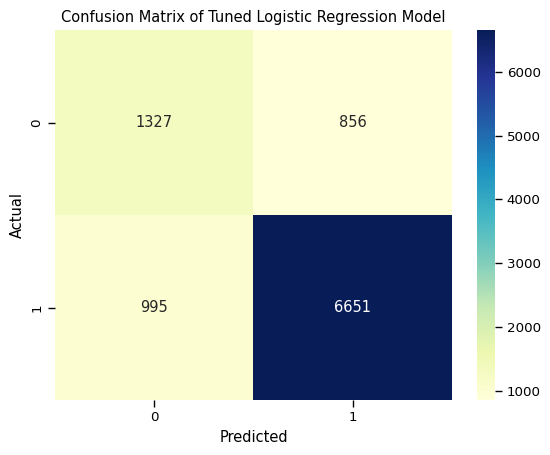

In [136]:
#Heatmap of Confusion metrics

sns.heatmap(confusion_best_lrm, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Tuned Logistic Regression Model")
plt.show()

In [137]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_lrm))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      2183
           1       0.89      0.87      0.88      7646

    accuracy                           0.81      9829
   macro avg       0.73      0.74      0.73      9829
weighted avg       0.82      0.81      0.81      9829



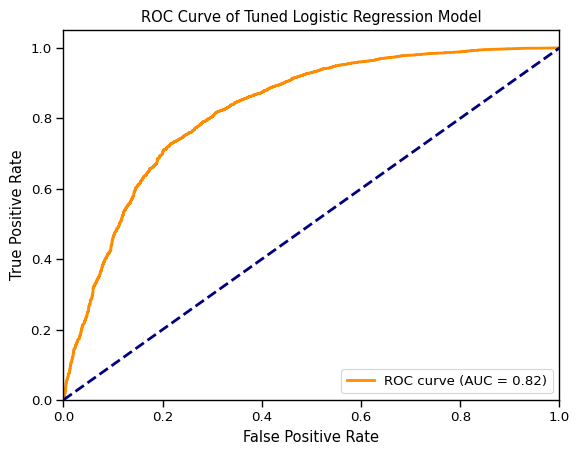

In [138]:
#ROC Curve

fpr_best_lrm, tpr_best_lrm, thresholds_best_lrm = roc_curve(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
auc_best_lrm = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best_lrm, tpr_best_lrm, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_best_lrm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Tuned Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

In [139]:
# Get the coefficients
coefficients_lrm = best_logistic_model.coef_
intercept_lrm = best_logistic_model.intercept_

# Corresponding variable names
variable_names = X_resampled.columns  # the name of the features DataFrame
variable_names = np.append(variable_names, "Intercept")

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': np.append(coefficients_lrm.flatten(), intercept_lrm)})

# Print the table
print(coefficients_df)

                          Variable  Coefficient
0                     PRODUCT_TYPE    -0.023914
1                 POLICYTERM_YEARS    -0.008200
2                   ANNUAL_PREMIUM    -0.010860
3                    TENURE_MONTHS    -0.155040
4                     NO_OF_COVERS     0.025169
5                 TOTAL_SUMINSURED    -0.156566
6                 BASIC_SUMINSURED     0.039092
7              ACCIDENT_SUMINSURED    -0.224140
8       HOSPITALIZATION_SUMINSURED    -0.210543
9          OTHER COVERS_SUMINSURED     0.018591
10                             AGE    -0.027263
11                          GENDER     0.631939
12                  MARITAL_STATUS     0.608865
13             PAYMENT_FREQUENCY_A     2.703760
14             PAYMENT_FREQUENCY_H     3.590363
15             PAYMENT_FREQUENCY_M     3.325776
16             PAYMENT_FREQUENCY_Q     3.953393
17             PAYMENT_METHOD_CASH     3.696909
18  PAYMENT_METHOD_DIGITAL PAYMENT     3.881458
19   PAYMENT_METHOD_STANDING ORDER     3

                           Feature  Coefficient
0              PAYMENT_FREQUENCY_Q     3.953393
1   PAYMENT_METHOD_DIGITAL PAYMENT     3.881458
2              PAYMENT_METHOD_CASH     3.696909
3              PAYMENT_FREQUENCY_H     3.590363
4    PAYMENT_METHOD_STANDING ORDER     3.328521
5              PAYMENT_FREQUENCY_M     3.325776
6              PAYMENT_FREQUENCY_A     2.703760
7                           GENDER     0.631939
8                   MARITAL_STATUS     0.608865
9              ACCIDENT_SUMINSURED     0.224140
10      HOSPITALIZATION_SUMINSURED     0.210543
11                TOTAL_SUMINSURED     0.156566
12                   TENURE_MONTHS     0.155040
13                BASIC_SUMINSURED     0.039092
14                             AGE     0.027263
15                    NO_OF_COVERS     0.025169
16                    PRODUCT_TYPE     0.023914
17         OTHER COVERS_SUMINSURED     0.018591
18                  ANNUAL_PREMIUM     0.010860
19                POLICYTERM_YEARS     0

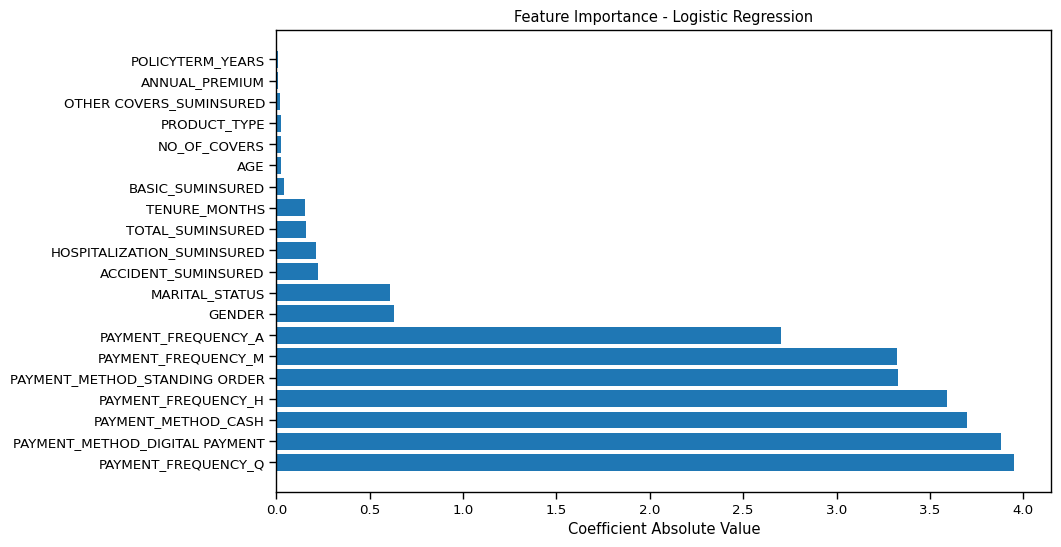

In [140]:
#Feature Importance Analysis

absolute_coefficients = np.abs(coefficients_lrm)
feature_importance = absolute_coefficients[0]
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = variable_names[sorted_indices]
sorted_coefficients = feature_importance[sorted_indices]

feature_importance_df = pd.DataFrame({'Feature': sorted_features, 'Coefficient': sorted_coefficients})
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Absolute Value')
plt.title('Feature Importance - Logistic Regression')
plt.show()

## Decision Tree Classifier

In [154]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Train the model on the resampled training data
decision_tree_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

In [155]:
# Make predictions on the test data
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_dt

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [156]:
# Evaluate the model's performance

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy of Decision Tree Model:", accuracy_dt)
print("Precision of Decision Tree Model:", precision_dt)
print("Recall of Decision Tree Model:", recall_dt)
print("F1 Score of Decision Tree Model:", f1_dt)

Accuracy of Decision Tree Model: 0.8153423542578085
Precision of Decision Tree Model: 0.9004257656915259
Recall of Decision Tree Model: 0.8574417996337954
F1 Score of Decision Tree Model: 0.8784082535003684


In [157]:
# Print the confusion metrics
print("Confusion Matrix of Decision Tree Model:\n", confusion_dt)

Confusion Matrix of Decision Tree Model:
 [[1458  725]
 [1090 6556]]


In [158]:
#Classification Report

print("Classification Report of Decision Tree Model:\n", report_dt)

Classification Report of Decision Tree Model:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62      2183
           1       0.90      0.86      0.88      7646

    accuracy                           0.82      9829
   macro avg       0.74      0.76      0.75      9829
weighted avg       0.83      0.82      0.82      9829



In [159]:
# Define hyperparameters and their possible values for a Grid Search in Decision Tree Model

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],  # None means no maximum depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Create a grid search
grid_search_dt = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid_dt, scoring='accuracy', cv=5)

# Fit the grid search to your resampled training data
grid_search_dt.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree Model:", best_params_dt)


Best Hyperparameters for Decision Tree Model: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [160]:
# Train a new Decision Tree model with the best hyperparameters

best_decision_tree_model = DecisionTreeClassifier(random_state=0, criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2)
best_decision_tree_model.fit(X_resampled, y_resampled)

# Make predictions and evaluate the new model
y_pred_best_dt = best_decision_tree_model.predict(X_test)

In [161]:
# Evaluate the model's performance

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
recall_best_dt = recall_score(y_test, y_pred_best_dt)
confusion_best_dt = confusion_matrix(y_test, y_pred_best_dt)
report_best_dt = classification_report(y_test, y_pred_best_dt)

print("Accuracy of Decision Tree Model:", accuracy_best_dt)
print("Precision of Decision Tree Model:", precision_best_dt)
print("Recall of Decision Tree Model:", recall_best_dt)
print("F1 Score of Decision Tree Model:", f1_best_dt)

Accuracy of Decision Tree Model: 0.8484077729168786
Precision of Decision Tree Model: 0.9154967602591793
Recall of Decision Tree Model: 0.8869997384253204
F1 Score of Decision Tree Model: 0.9010229839245384


In [162]:
# Print the confusion metrics
print("Confusion Matrix of Tuned Decision Tree Model:\n", confusion_best_dt)

Confusion Matrix of Tuned Decision Tree Model:
 [[1557  626]
 [ 864 6782]]


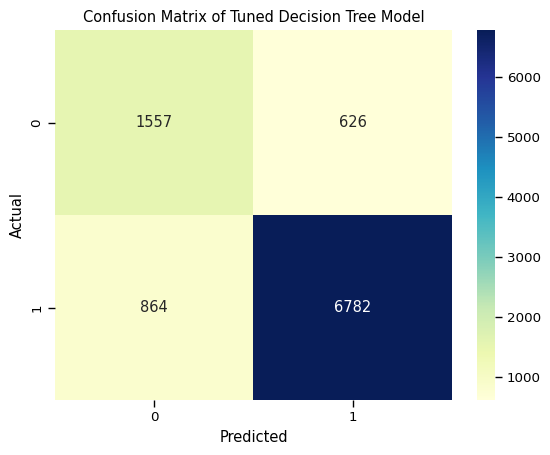

In [167]:
#Heatmap of Confusion metrics

sns.heatmap(confusion_best_dt, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Tuned Decision Tree Model")
plt.show()

In [163]:
#Classification Report
print("Classification Report of Tuned Decision Tree Model:\n", report_best_dt)

Classification Report of Tuned Decision Tree Model:
               precision    recall  f1-score   support

           0       0.64      0.71      0.68      2183
           1       0.92      0.89      0.90      7646

    accuracy                           0.85      9829
   macro avg       0.78      0.80      0.79      9829
weighted avg       0.86      0.85      0.85      9829



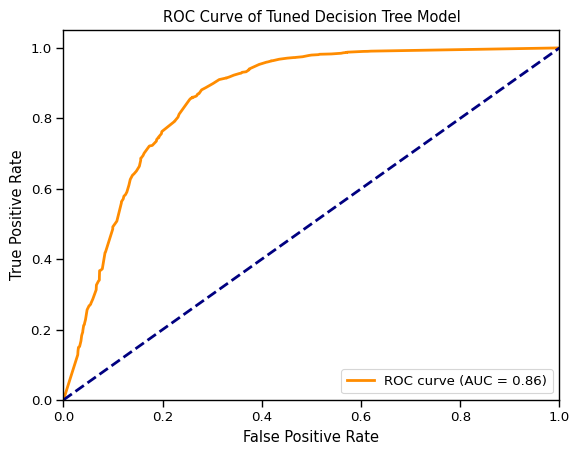

In [164]:
#ROC Curve

fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test, best_decision_tree_model.predict_proba(X_test)[:, 1])
auc_best_dt = roc_auc_score(y_test, best_decision_tree_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best_dt, tpr_best_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_best_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Tuned Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

                           Feature  Importance
3                    TENURE_MONTHS    0.542264
13             PAYMENT_FREQUENCY_A    0.064593
16             PAYMENT_FREQUENCY_Q    0.060345
15             PAYMENT_FREQUENCY_M    0.052190
2                   ANNUAL_PREMIUM    0.043523
7              ACCIDENT_SUMINSURED    0.042353
17             PAYMENT_METHOD_CASH    0.035501
18  PAYMENT_METHOD_DIGITAL PAYMENT    0.027457
14             PAYMENT_FREQUENCY_H    0.025627
11                          GENDER    0.017076
6                 BASIC_SUMINSURED    0.015249
9          OTHER COVERS_SUMINSURED    0.014995
0                     PRODUCT_TYPE    0.014840
10                             AGE    0.011466
19   PAYMENT_METHOD_STANDING ORDER    0.007510
8       HOSPITALIZATION_SUMINSURED    0.007276
1                 POLICYTERM_YEARS    0.006893
5                 TOTAL_SUMINSURED    0.006770
12                  MARITAL_STATUS    0.002633
4                     NO_OF_COVERS    0.001437


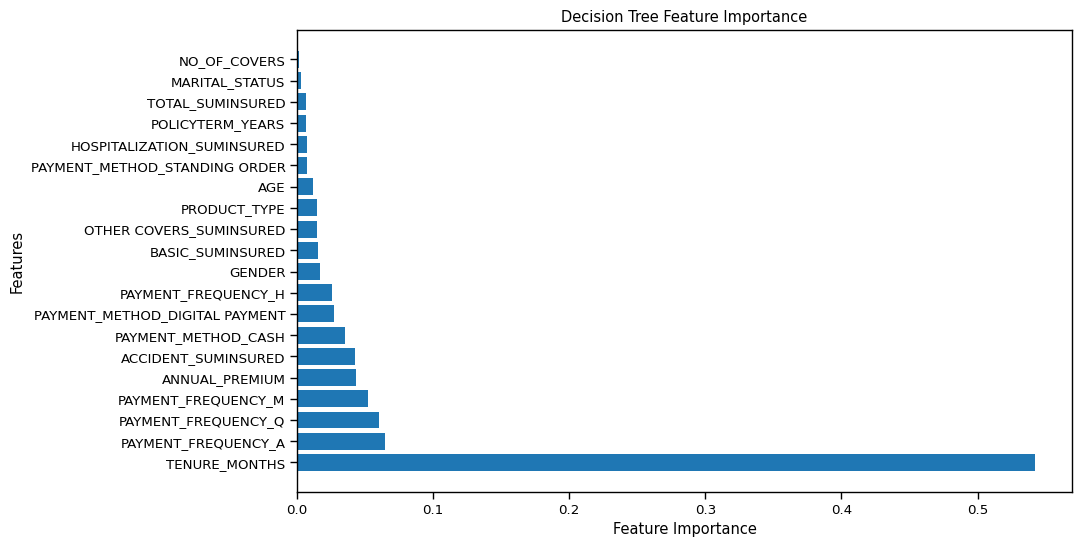

In [165]:
# Get feature importances
feature_importances_dt = best_decision_tree_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_dt = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importances_dt})

# Sort the DataFrame by importance in descending order
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

print(feature_importance_dt)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

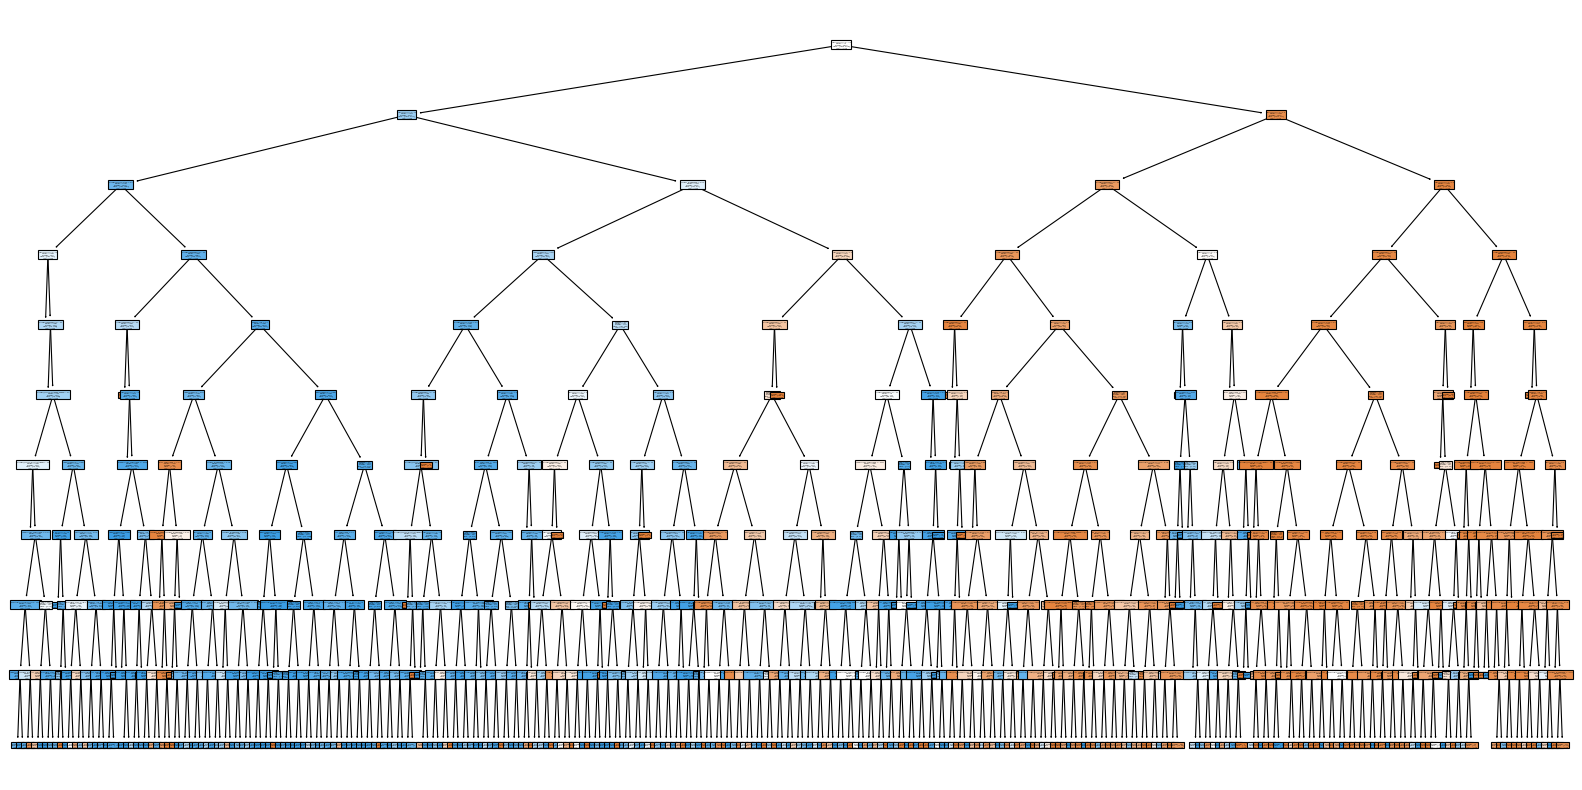

In [166]:
# Plot the Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model, filled=True, feature_names=X_resampled.columns, class_names=["ACTIVE", "LAPSE"])
plt.show()

## Support Vector Classification (SVC) with a linear kernel

In [202]:
# Initialize the SVC model with a linear kernel
svc_model = SVC(kernel='linear', random_state=0, probability=True)

# Train the model on the resampled training data
svc_model.fit(X_resampled, y_resampled)

SVC(kernel='linear', probability=True, random_state=0)

In [204]:
# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)
y_pred_svc

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [205]:
# Evaluate the model's performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
confusion_svc = confusion_matrix(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print("Accuracy of SVC Model:", accuracy_svc)
print("Precision of SVC Model:", precision_svc)
print("Recall of SVC Model:", recall_svc)
print("F1 Score of SVC Model:", f1_svc)

Accuracy of SVC Model: 0.8192084647471767
Precision of SVC Model: 0.8914232359610511
Recall of SVC Model: 0.874051791786555
F1 Score of SVC Model: 0.8826520504523542


In [206]:
# Print the confusion matrix
print("Confusion Matrix of SVC Model:\n", confusion_svc)

Confusion Matrix of SVC Model:
 [[1369  814]
 [ 963 6683]]


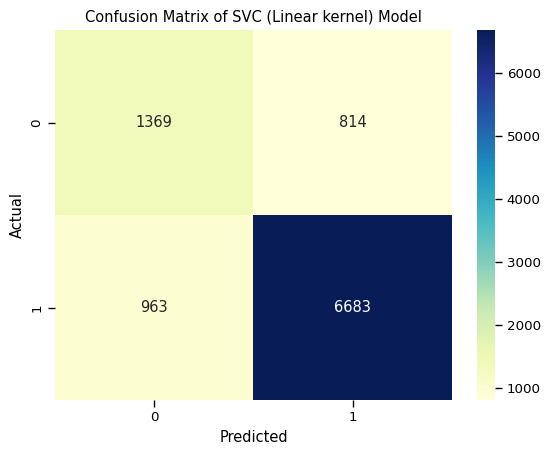

In [207]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_svc, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVC (Linear kernel) Model")
plt.show()

In [208]:
#Classification Report
print("Classification Report of SVC Model:\n", report_svc)

Classification Report of SVC Model:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      2183
           1       0.89      0.87      0.88      7646

    accuracy                           0.82      9829
   macro avg       0.74      0.75      0.74      9829
weighted avg       0.82      0.82      0.82      9829



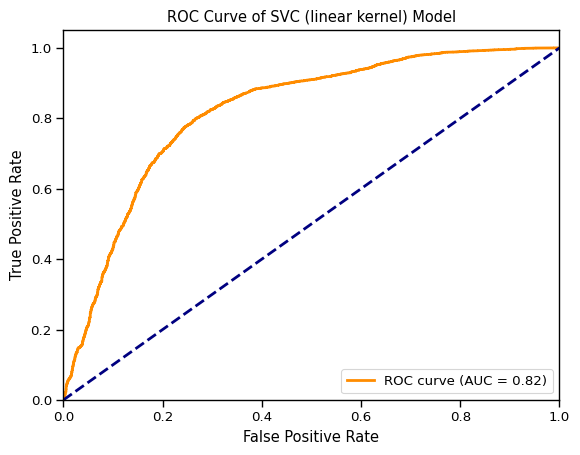

In [209]:
#ROC Curve

fpr_svc_lk, tpr_svc_lk, thresholds_svc_lk = roc_curve(y_test, svc_model.predict_proba(X_test)[:, 1])
auc_svc_lk = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_svc_lk, tpr_svc_lk, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svc_lk:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVC (linear kernel) Model')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine (SVM) with Radial Basis Function (RBF)

In [210]:
# Initialize the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=0, probability=True)

# Train the model on the resampled training data
svm_rbf.fit(X_resampled, y_resampled)

SVC(probability=True, random_state=0)

In [211]:
# Make predictions on the test data
y_pred_svm_rbf = svm_rbf.predict(X_test)
y_pred_svm_rbf

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [213]:
# Evaluate the model's performance
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
confusion_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
report_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

# Print the evaluation metrics
print("Accuracy of SVM (RBF Kernel) Model:", accuracy_svm_rbf)
print("Precision of SVM (RBF Kernel) Model:", precision_svm_rbf)
print("Recall of SVM (RBF Kernel) Model:", recall_svm_rbf)
print("F1 Score of SVM (RBF Kernel) Model:", f1_svm_rbf)

Accuracy of SVM (RBF Kernel) Model: 0.8118832027673212
Precision of SVM (RBF Kernel) Model: 0.8985288051698062
Recall of SVM (RBF Kernel) Model: 0.8546952654982998
F1 Score of SVM (RBF Kernel) Model: 0.8760640793618876


In [214]:
# Print the confusion matrix
print("Confusion Matrix of SVM (RBF Kernel) Model:\n", confusion_svm_rbf)

Confusion Matrix of SVM (RBF Kernel) Model:
 [[1445  738]
 [1111 6535]]


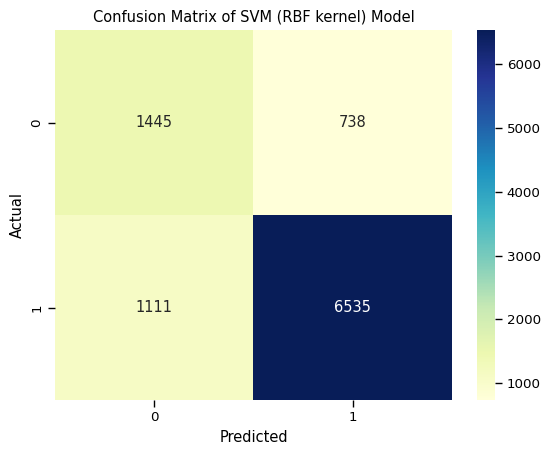

In [215]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_svm_rbf, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM (RBF kernel) Model")
plt.show()

In [216]:
# Print the classification report
print("Classification Report of SVM (RBF Kernel) Model:\n", report_svm_rbf)

Classification Report of SVM (RBF Kernel) Model:
               precision    recall  f1-score   support

           0       0.57      0.66      0.61      2183
           1       0.90      0.85      0.88      7646

    accuracy                           0.81      9829
   macro avg       0.73      0.76      0.74      9829
weighted avg       0.82      0.81      0.82      9829



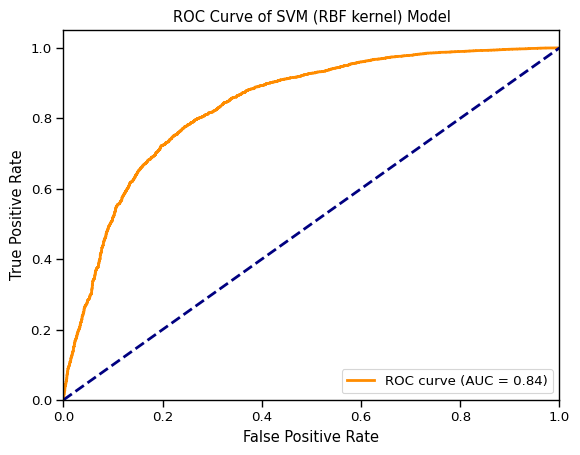

In [217]:
#ROC Curve

fpr_svm_rbf, tpr_svm_rbf, thresholds_svm_rbf = roc_curve(y_test, svm_rbf.predict_proba(X_test)[:, 1])
auc_svm_rbf = roc_auc_score(y_test, svm_rbf.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm_rbf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM (RBF kernel) Model')
plt.legend(loc="lower right")
plt.show()

## Ensemble Models

## Random Forest Model

In [186]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Train the model on the resampled training data
random_forest_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=0)

In [187]:
# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [188]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation metrics
print("Accuracy of Random Forest Model:", accuracy_rf)
print("Precision of Random Forest Model:", precision_rf)
print("Recall of Random Forest Model:", recall_rf)
print("F1 Score of Random Forest Model:", f1_rf)

Accuracy of Random Forest Model: 0.879234917082104
Precision of Random Forest Model: 0.9150494795013494
Recall of Random Forest Model: 0.9312058592728224
F1 Score of Random Forest Model: 0.9230569780255395


In [189]:
# Print the confusion metrics
print("Confusion Matrix of Random Forest Model:\n", confusion_rf)

Confusion Matrix of Random Forest Model:
 [[1522  661]
 [ 526 7120]]


In [190]:
#Classification report
print("Classification Report of Random Forest Model:\n", report_rf)

Classification Report of Random Forest Model:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      2183
           1       0.92      0.93      0.92      7646

    accuracy                           0.88      9829
   macro avg       0.83      0.81      0.82      9829
weighted avg       0.88      0.88      0.88      9829



In [191]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_rf.fit(X_resampled, y_resampled)


# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

print("Best Hyperparameters for Random Forest Model:", best_params_rf)

Best Hyperparameters for Random Forest Model: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [192]:
# Train a new Random forest model with the best hyperparameters

best_rf_model = RandomForestClassifier(random_state=0, **best_params_rf)
best_rf_model.fit(X_resampled, y_resampled)

# Make predictions and evaluate the new model
y_pred_best_rf = best_rf_model.predict(X_test)

In [193]:
# Evaluate the model's performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
confusion_best_rf = confusion_matrix(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)

# Print the evaluation metrics
print("Accuracy of Random Forest Model:", accuracy_best_rf)
print("Precision of Random Forest Model:", precision_best_rf)
print("Recall of Random Forest Model:", recall_best_rf)
print("F1 Score of Random Forest Model:", f1_best_rf)

Accuracy of Random Forest Model: 0.8781157798351816
Precision of Random Forest Model: 0.9148224395265054
Recall of Random Forest Model: 0.9298979858749673
F1 Score of Random Forest Model: 0.922298612011934


In [194]:
# Print the confusion metrics
print("Confusion Matrix of Random Forest Model:\n", confusion_best_rf)

Confusion Matrix of Random Forest Model:
 [[1521  662]
 [ 536 7110]]


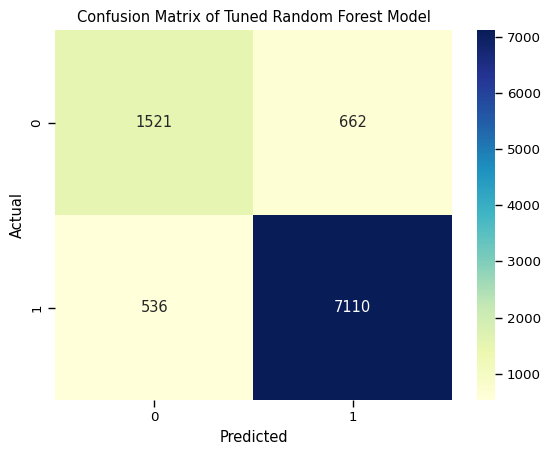

In [196]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_best_rf, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Tuned Random Forest Model")
plt.show()

In [197]:
#Classification report
print("Classification Report of Random Forest Model:\n", report_best_rf)

Classification Report of Random Forest Model:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      2183
           1       0.91      0.93      0.92      7646

    accuracy                           0.88      9829
   macro avg       0.83      0.81      0.82      9829
weighted avg       0.88      0.88      0.88      9829



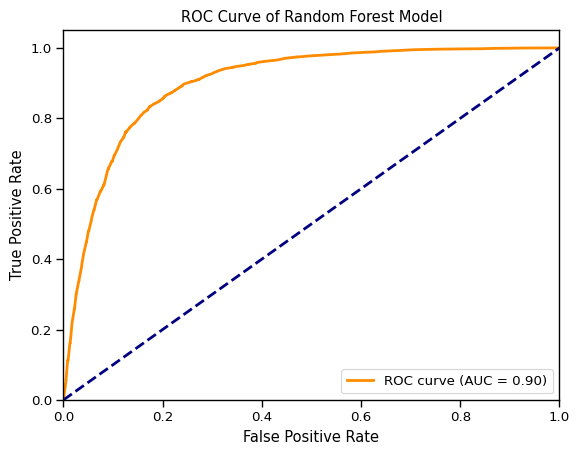

In [198]:
#ROC Curve

fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_best_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Model')
plt.legend(loc="lower right")
plt.show()

                           Feature  Importance
3                    TENURE_MONTHS    0.333713
2                   ANNUAL_PREMIUM    0.076888
6                 BASIC_SUMINSURED    0.062752
5                 TOTAL_SUMINSURED    0.059718
10                             AGE    0.058795
15             PAYMENT_FREQUENCY_M    0.051653
8       HOSPITALIZATION_SUMINSURED    0.046524
7              ACCIDENT_SUMINSURED    0.045852
9          OTHER COVERS_SUMINSURED    0.041939
17             PAYMENT_METHOD_CASH    0.040336
1                 POLICYTERM_YEARS    0.037507
16             PAYMENT_FREQUENCY_Q    0.030354
18  PAYMENT_METHOD_DIGITAL PAYMENT    0.019085
0                     PRODUCT_TYPE    0.016271
19   PAYMENT_METHOD_STANDING ORDER    0.015846
11                          GENDER    0.015457
13             PAYMENT_FREQUENCY_A    0.014598
4                     NO_OF_COVERS    0.012544
14             PAYMENT_FREQUENCY_H    0.011593
12                  MARITAL_STATUS    0.008575


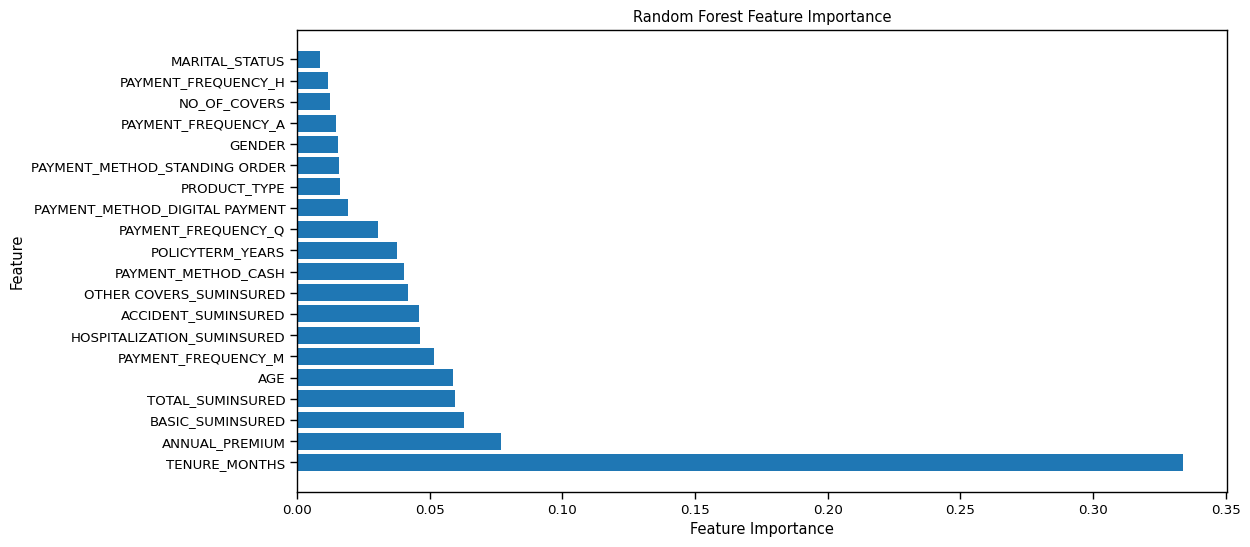

In [201]:
# Get feature importances of Random Forest Model

feature_importances_rf = best_rf_model.feature_importances_

# Get the names of the features
feature_names_rf = X_resampled.columns

# Create a DataFrame to display the feature names and their importances
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances_rf})

# Sort the features by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_df_rf)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

## XGBoost Model

In [223]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=0)

# Train the model on the resampled training data
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [224]:
# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 0, 1, ..., 1, 0, 1])

In [225]:
# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# Print the evaluation metrics
print("Accuracy of XGBoost Model:", accuracy_xgb)
print("Precision of XGBoost  Model:", precision_xgb)
print("Recall of XGBoost  Model:", recall_xgb)
print("F1 Score of XGBoost  Model:", f1_xgb)

Accuracy of XGBoost Model: 0.8841184250686743
Precision of XGBoost  Model: 0.914617051102332
Recall of XGBoost  Model: 0.9386607376405964
F1 Score of XGBoost  Model: 0.9264829277738332


In [226]:
# Print the confusion matrix
print("Confusion Matrix of XGBosst Model:\n", confusion_xgb)

Confusion Matrix of XGBosst Model:
 [[1513  670]
 [ 469 7177]]


In [227]:
#Classification report
print("Classification Report of XGBoost Model:\n", report_xgb)

Classification Report of XGBoost Model:
               precision    recall  f1-score   support

           0       0.76      0.69      0.73      2183
           1       0.91      0.94      0.93      7646

    accuracy                           0.88      9829
   macro avg       0.84      0.82      0.83      9829
weighted avg       0.88      0.88      0.88      9829



In [228]:
# Define the parameter grid to search for XGBoost

param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 4, 5],          # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Initialize the GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)

# Fit the model to the data
grid_search_xgb.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

print("Best Hyperparameters for XGBoost Model:", best_params_xgb)

Best Hyperparameters for XGBoost Model: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}


In [229]:
# Train a XGBoost model with the best hyperparameters

best_xgb_model = XGBClassifier(random_state=0, **best_params_xgb)
best_xgb_model.fit(X_resampled, y_resampled)

# Make predictions and evaluate the new model
y_pred_best_xgb = best_xgb_model.predict(X_test)

In [230]:
# Evaluate the model's performance
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test,y_pred_best_xgb)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
confusion_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
report_best_xgb = classification_report(y_test, y_pred_best_xgb)

# Print the evaluation metrics
print("Accuracy of XGBoost Model:", accuracy_best_xgb)
print("Precision of XGBoost  Model:", precision_best_xgb)
print("Recall of XGBoost  Model:", recall_best_xgb)
print("F1 Score of XGBoost  Model:", f1_best_xgb)

Accuracy of XGBoost Model: 0.8861532200630786
Precision of XGBoost  Model: 0.9144126984126985
Recall of XGBoost  Model: 0.9417996337954486
F1 Score of XGBoost  Model: 0.9279041298885382


In [231]:
# Print the confusion matrix
print("Confusion Matrix of XGBosst Model:\n", confusion_best_xgb)

Confusion Matrix of XGBosst Model:
 [[1509  674]
 [ 445 7201]]


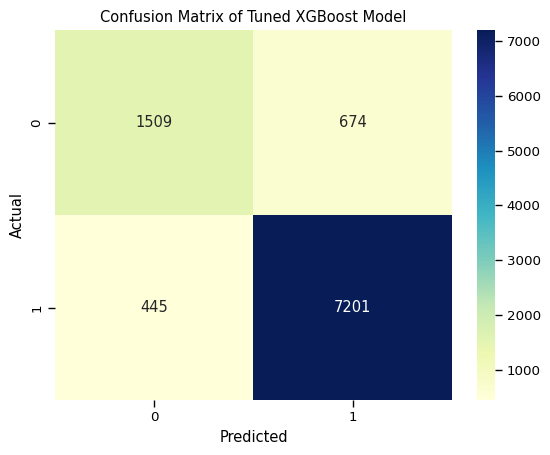

In [232]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_best_xgb, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Tuned XGBoost Model")
plt.show()

In [233]:
#Classification report
print("Classification Report of XGBoost Model:\n", report_best_xgb)

Classification Report of XGBoost Model:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      2183
           1       0.91      0.94      0.93      7646

    accuracy                           0.89      9829
   macro avg       0.84      0.82      0.83      9829
weighted avg       0.88      0.89      0.88      9829



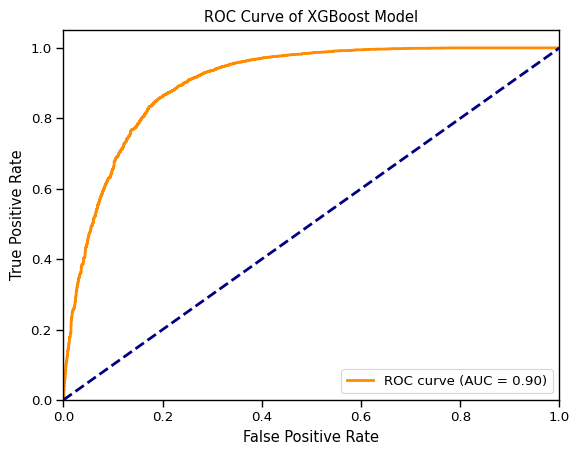

In [234]:
#ROC Curve

fpr_best_xgb, tpr_best_xgb, thresholds_best_xgb = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
auc_best_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_best_xgb, tpr_best_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_best_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost Model')
plt.legend(loc="lower right")
plt.show()

                           Feature  Importance
19   PAYMENT_METHOD_STANDING ORDER    0.142453
16             PAYMENT_FREQUENCY_Q    0.134740
13             PAYMENT_FREQUENCY_A    0.115252
14             PAYMENT_FREQUENCY_H    0.106318
3                    TENURE_MONTHS    0.100458
18  PAYMENT_METHOD_DIGITAL PAYMENT    0.080678
17             PAYMENT_METHOD_CASH    0.067207
15             PAYMENT_FREQUENCY_M    0.064312
11                          GENDER    0.023636
7              ACCIDENT_SUMINSURED    0.022851
0                     PRODUCT_TYPE    0.022681
9          OTHER COVERS_SUMINSURED    0.019934
12                  MARITAL_STATUS    0.018691
8       HOSPITALIZATION_SUMINSURED    0.016429
4                     NO_OF_COVERS    0.014994
2                   ANNUAL_PREMIUM    0.013565
6                 BASIC_SUMINSURED    0.010266
1                 POLICYTERM_YEARS    0.010074
10                             AGE    0.008625
5                 TOTAL_SUMINSURED    0.006836


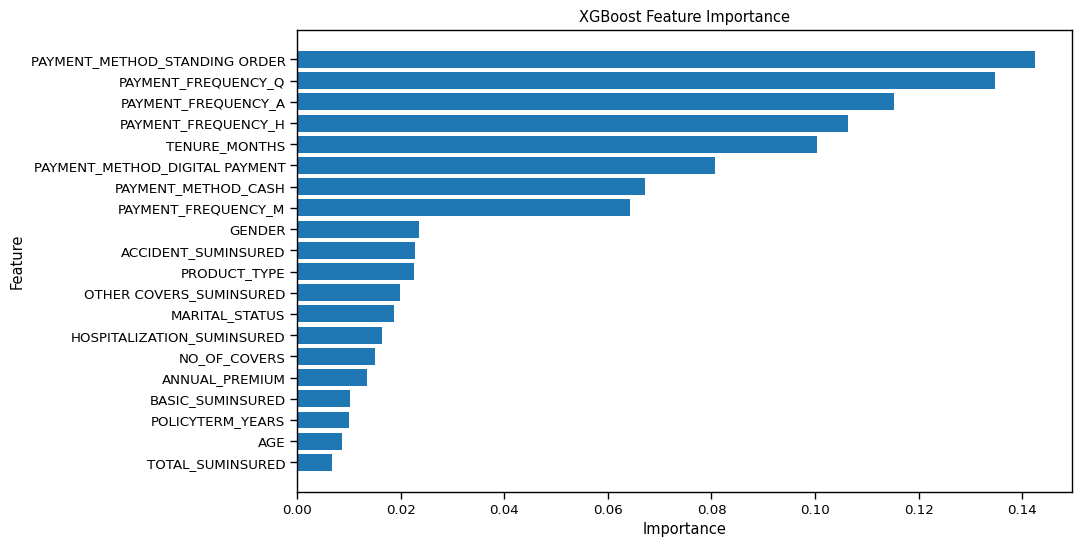

In [235]:
# Get feature importances from the trained model
importances_xgb = best_xgb_model.feature_importances_

# Get the names of the features
feature_names_xgb = X_resampled.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': importances_xgb})

# Sort the DataFrame in descending order of importance
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Print the sorted table of feature importances
print(feature_importance_df_xgb)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis for the most important feature to be at the top
plt.show()

## Ensemble Model using Voting Classifier

In [239]:
#Creating a voting classifier using Random Forest, SVM and XGBoost models

# Create individual classifier instances
svm_classifier = SVC(kernel='rbf', random_state=0, probability=True)
rf_classifier = RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=0)
xgb_classifier = XGBClassifier(colsample_bytree= 0.9, learning_rate= 0.2, max_depth= 5, n_estimators= 300, subsample= 0.9, random_state=0)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('random_forest', rf_classifier),
        ('xgboost', xgb_classifier)
    ],
    voting='soft'
)

In [240]:
# Fit the Voting Classifier on the training data
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions using the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)

In [241]:
# Evaluate the Voting Classifier's performance
accuracy_vc = accuracy_score(y_test, y_pred_voting)
precision_vc = precision_score(y_test, y_pred_voting)
recall_vc = recall_score(y_test, y_pred_voting)
f1_vc = f1_score(y_test, y_pred_voting)
confusion_vc = confusion_matrix(y_test, y_pred_voting)
report_vc = classification_report(y_test, y_pred_voting)

# Print the evaluation metrics
print("Accuracy of Voting Classifier:", accuracy_vc)
print("Precision of Voting Classifier:", precision_vc)
print("Recall of Voting Classifier:", recall_vc)
print("F1 Score of Voting Classifier:", f1_vc)

Accuracy of Voting Classifier: 0.8851358225658765
Precision of Voting Classifier: 0.9172749391727494
Recall of Voting Classifier: 0.9368297148835992
F1 Score of Voting Classifier: 0.9269492073762536


In [242]:
# Print the confusion matrix
print("Confusion Matrix of Voting Classifier Model:\n", confusion_vc)

Confusion Matrix of Voting Classifier Model:
 [[1537  646]
 [ 483 7163]]


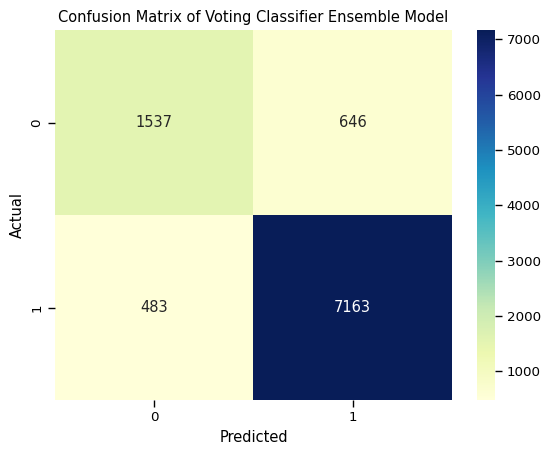

In [243]:
#Heatmap of Confusion matrix

sns.heatmap(confusion_vc, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Voting Classifier Ensemble Model")
plt.show()

In [244]:
# Print the classification report
print("Classification Report of Voting Classifier Model:\n", report_vc)

Classification Report of Voting Classifier Model:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      2183
           1       0.92      0.94      0.93      7646

    accuracy                           0.89      9829
   macro avg       0.84      0.82      0.83      9829
weighted avg       0.88      0.89      0.88      9829



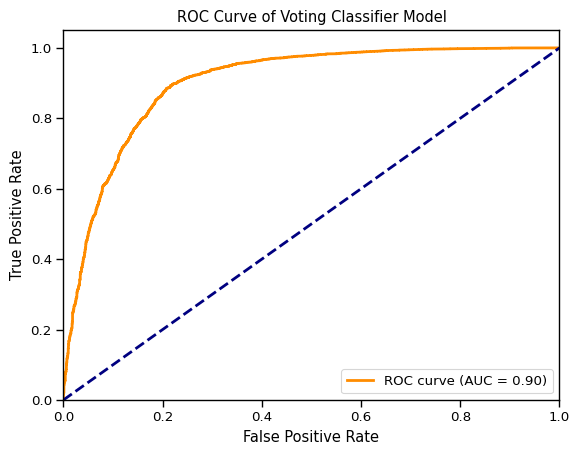

In [246]:
#ROC Curve

fpr_vc, tpr_vc, thresholds_vc = roc_curve(y_test, voting_classifier.predict_proba(X_test)[:, 1])
auc_vc = roc_auc_score(y_test, voting_classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_vc, tpr_vc, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_vc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Voting Classifier Model')
plt.legend(loc="lower right")
plt.show()

## Cross Validation and Comparison on Different Models

In [249]:
models = []

models.append(('Logistic Regression', LogisticRegression(random_state=0, max_iter=10000, C= 0.1)))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0, probability=True)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0,probability=True)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=0, criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2)))
models.append(('Random Forest', RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=0)))
models.append(("XGBoost", XGBClassifier(colsample_bytree= 0.9, learning_rate= 0.2, max_depth= 5, n_estimators= 300, subsample= 0.9, random_state=0)))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('svm', SVC(kernel = 'rbf', random_state = 0, probability=True)) ,('rf',  RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=0)), ('xgb', XGBClassifier(colsample_bytree= 0.9, learning_rate= 0.2, max_depth= 5, n_estimators= 300, subsample= 0.9, random_state=0))], voting='soft')))


In [250]:
# Lists to store results
acc_results = []
auc_results = []
precision_results = []
recall_results = []
f1_results = []
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD", "Precision Mean", "Recall Mean", "F1 Mean"]
model_results = pd.DataFrame(columns=result_col)

i = 0
# K-fold cross-validation
for name, model in models:
    names.append(name)
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_acc_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring="accuracy")
    cv_auc_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring="roc_auc")
    
    # Additional metrics
    y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=kfold)
    classification_rep = classification_report(y_resampled, y_pred, output_dict=True)
    
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    # Store precision, recall, and F1-score in lists
    precision_results.append(classification_rep["weighted avg"]["precision"] * 100)
    recall_results.append(classification_rep["weighted avg"]["recall"] * 100)
    f1_results.append(classification_rep["weighted avg"]["f1-score"] * 100)
    
    # Add all metrics to the DataFrame
    model_results.loc[i] = [name, 
                            round(cv_auc_results.mean() * 100, 2),
                            round(cv_auc_results.std() * 100, 2),
                            round(cv_acc_results.mean() * 100, 2),
                            round(cv_acc_results.std() * 100, 2),
                            round(precision_results[i], 2),
                            round(recall_results[i], 2),
                            round(f1_results[i], 2)]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Recall Mean,F1 Mean
4,Random Forest,97.09,0.15,91.54,0.36,91.59,91.54,91.54
5,XGBoost,96.97,0.15,91.50,0.23,91.63,91.50,91.49
6,Voting Classifier,96.48,0.13,91.11,0.37,91.23,91.11,91.10
3,Decision Tree Classifier,92.51,0.27,85.36,0.32,85.63,85.36,85.34
0,Logistic Regression,89.39,0.18,81.70,0.22,82.06,81.70,81.65
1,SVC,89.04,0.19,82.29,0.20,82.66,82.29,82.24
2,Kernel SVM,87.10,0.11,78.49,0.35,79.03,78.49,78.39


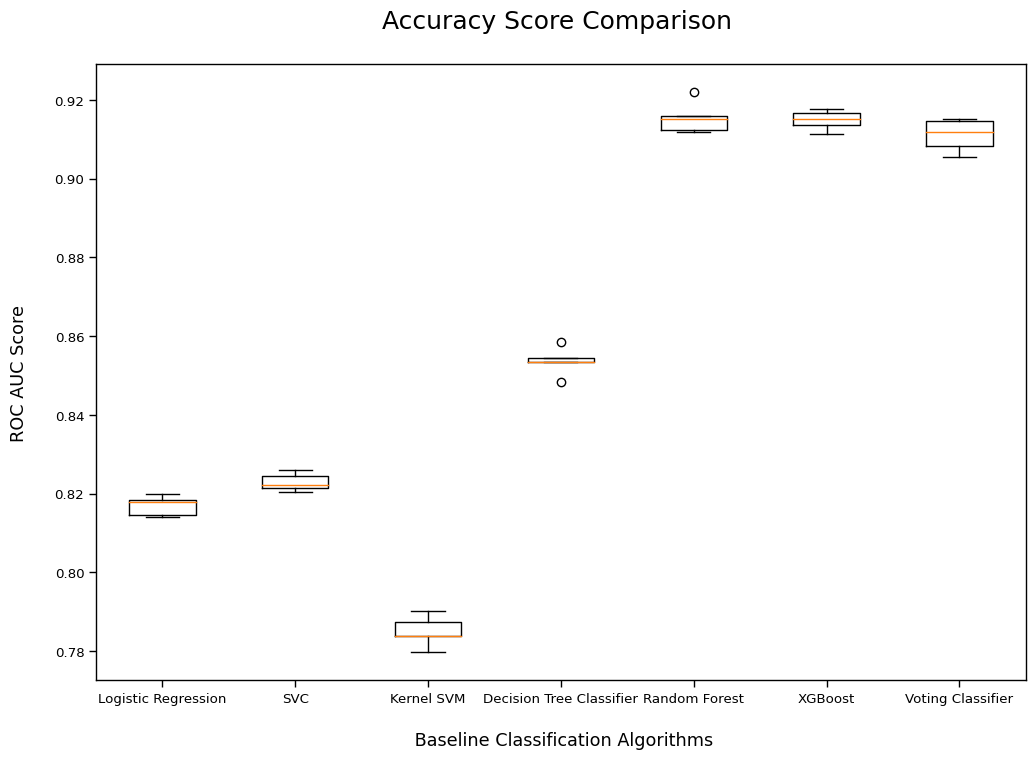

In [253]:
#Accuracy Score Comparison

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "18", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

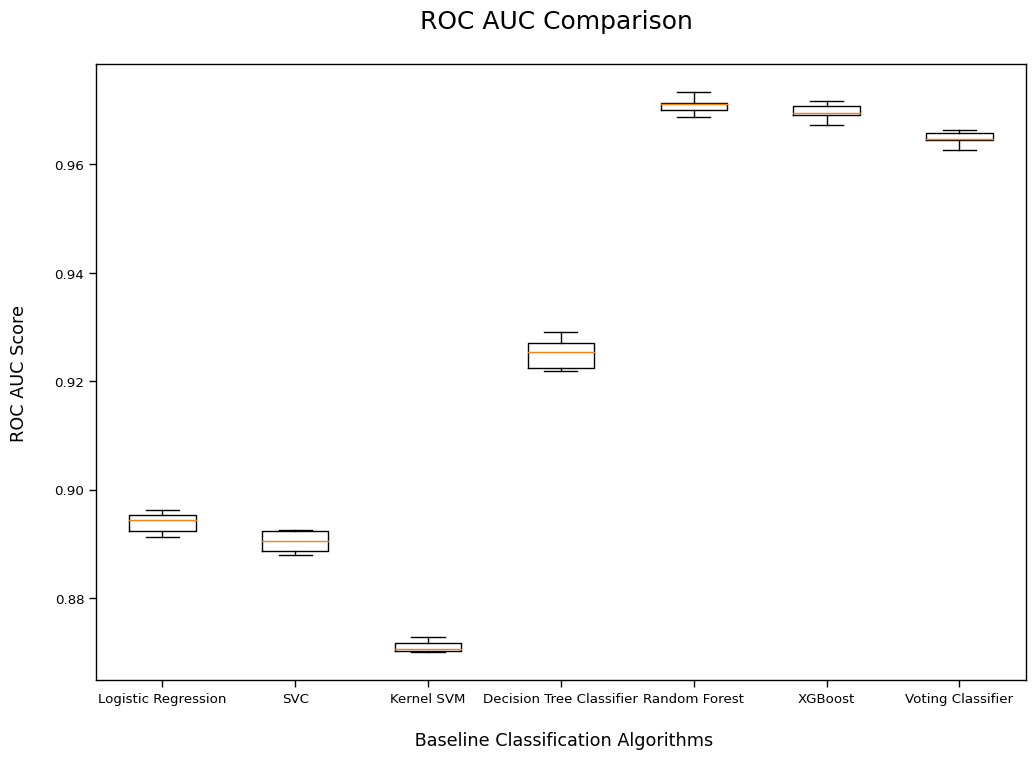

In [254]:
#ROC AUC Comparison

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "18", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()